<a href="https://colab.research.google.com/github/AmandineLecerfDefer/OC_P3_Concevez_une_application_au_service_de_la-_ante_ublique/blob/main/PSante%CC%81_01_notebooknettoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u><font color='red'>Projet 3 : Concevez une application au service de la santé publique</font></u></center>

Lecerf Defer Amandine

## <font color='green'>Mise en place de l'environnement de travail</font>

In [ ]:
import pandas as pd
import numpy as  np
import collections
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#from matplotlib.figure import Figure
from decimal import Decimal


import seaborn as sns
import inspect
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from pandas.api.types import CategoricalDtype
from pandas.api.types import is_numeric_dtype
from collections import Counter


from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.neighbors import KDTree
from sklearn.impute import SimpleImputer 

from  sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [ ]:
#Optimisation automatique des colonnes pour avoir un maximum d'information
pd.options.display.width = 0

## <font color='green'>Importation des données en fonction de la méthode d'édition du notebook</font>

### <font color='blue'>**A exécuter si utilisation de google colab**</font>

Technique 1 :

In [ ]:
url="https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv"
data=pd.read_csv(url, sep='\t', low_memory=False)

Technique 2:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#%cd /content/drive/My\ Drive/Data_projet_OC
#!ls

In [ ]:
#data=pd.read_csv("/content/drive/MyDrive/Data_projet_OC/en.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

Technique 3 :

In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [ ]:
#data = pd.read_csv('Data/en.openfoodfacts.org.products.csv', sep='\t')

### <font color='blue'>**A exécuter si utilisation de kaggle**</font>

In [ ]:
#data = pd.read_csv('../input/data-projet3/en.openfoodfacts.org.products.csv', sep='\t')

### <font color='blue'>**Importation des données si fichier en local**</font>

In [ ]:
#data = pd.read_csv('Data/en.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

## <font color='green'>Découverte des données</font>

#### <font color='blue'> **Nombre de lignes et de colonnes**</font>

In [ ]:
data_orig = data.copy()

In [ ]:
def info_generales(dataframe):
  dataframe.info()
  print(" ")
  print(" ")
  print(" ")

  lignes = dataframe.shape[0] 
  colonnes = dataframe.shape[1]
  print("Le jeu de données a {} lignes et {} colonnes.".format(lignes,colonnes))


In [ ]:
info_generales(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637297 entries, 0 to 1637296
Columns: 184 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(60)
memory usage: 2.2+ GB
 
 
 
Le jeu de données a 1637297 lignes et 184 colonnes.


Le jeu de données Open Food Fact contient, au jour de mon analyse, 184 colonnes (variables différentes) pour 1 637 297 lignes (chaque ligne correspond à un produit alimentaire recueillit dans la base de données d'Open Food Fact).
Sur les premières lignes, il y a de nombreuses données manquantes (NAN).

#### <font color='blue'> **Types de données** </font>

In [ ]:
data.dtypes

code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 184, dtype: object

In [ ]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
data.select_dtypes(['O']).columns.nunique()

60

In [ ]:
data.select_dtypes(['int64']).columns.nunique()

2

In [ ]:
data.select_dtypes(['float64']).columns.nunique()

122

Dans le jeu de données, on retrouve 3 types de données. Certaines variables sont considérées comme des Objets (qui sont au nombre de 60 et qui concernent les données sous forme de chaine de caractères), d'autres sont de type int64 (qui sont au nombre de 2 et dont les valeurs sont des entiers) et les dernières sont de type float64 (qui sont au nombre de 122, qui contiennent des valeurs décimales et qui correspondent aux différents composants de chaque produit).  

#### <font color='blue'> **Représentation des colonnes** </font>

In [ ]:
list(data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

Il y a 5 sections (précision sur le site de openfoodfacts.org) dans lesquelles se répartissent les différents champs. Plusieurs colonnes traitent le même élément mais sous des noms de colonnes différents.

1. "*general informations*" : informations générales sur le produit
   * de la colonne 'code'…
   * … à la colonne 'quantity'
   
   
2. "*tags*" : ensemble de tags sur le produit et sa provenance
   * de la colonne 'packaging'…
   * … à la colonne 'countries_en'
   
   
3. "*ingredients*": ingrédients et allergènes
   * de la colonne 'ingredients_text'…
   * … à la colonne 'traces_en'
   
   
4. "*misc. data*" : informations diverses
   * de la colonne 'serving_size'…
   * … à la colonne 'image_nutrition_small_url'
   
   
5. "*nutrition facts*" : informations nutritionnelles
   * de la colonne 'energy_100g'…
   * … à la colonne 'carnitine_100g'

#### <font color='blue'> **Données Manquantes** </font>

##### <font color='purple'> **Répartition**</font>

In [ ]:
data.isna().sum()

code                        0
url                         0
creator                     4
created_t                   0
created_datetime            0
                       ...   
choline_100g          1637256
phylloquinone_100g    1635584
beta-glucan_100g      1637267
inositol_100g         1637250
carnitine_100g        1637277
Length: 184, dtype: int64

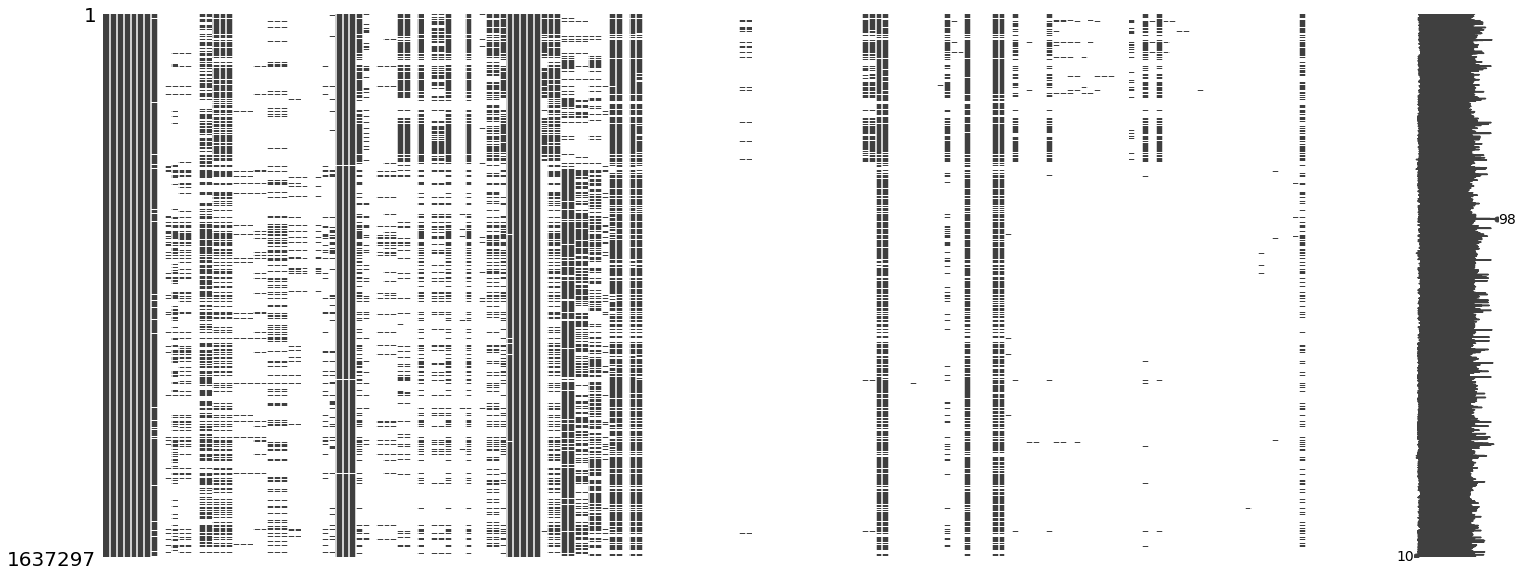

In [ ]:
msno.matrix(data)
#msno.matrix(data, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
#msno.bar(data, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12) 
#msno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12) 

On remarque qu'il y a beaucoup de données manquantes dans notre jeu de données. Certaines colonnes sont totalement vides alors que d'autres sont totalement complètes. Ce graphique nous permet de voir globalement la répartition des données manquantes mais on ne connaît pas exactement le taux de données manquantes dans le jeu de données.

##### <font color='purple'> ***Taux***</font>

In [ ]:
def pie_NaN(dataframe):

  lignes = dataframe.shape[0] 
  colonnes = dataframe.shape[1]

  # nombre de données non manquante
  nb_data = dataframe.count().sum()

  # nombre de données totale de ce jeu de données (colonnes*lignes)
  nb_totale = (colonnes*lignes)

  #taux remplissage jeu de données
  rate_dataOK = (nb_data/nb_totale)
  print("Le jeux de données est rempli à {:.2%}".format(rate_dataOK))
  print("et il a {:.2%} de données manquantes".format(1-rate_dataOK))
  print(" ")
  print(" ")

     
  # Pie Plot
  rates = [rate_dataOK, 1 - rate_dataOK]
  labels = ["Données", "NAN"]

  explode =(0,0.1) 
  colors = ['gold', 'pink']

  # Plot
  plt.figure(figsize=(12,15))
  plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})

  ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 32)
  ttl.set_position([0.5, 0.85])

  plt.axis('equal')
  #ax.legend(labels, loc = "upper right", fontsize = 18)
  plt.tight_layout() 

  plt.show()

  

Le jeux de données est rempli à 20.56%
et il a 79.44% de données manquantes
 
 


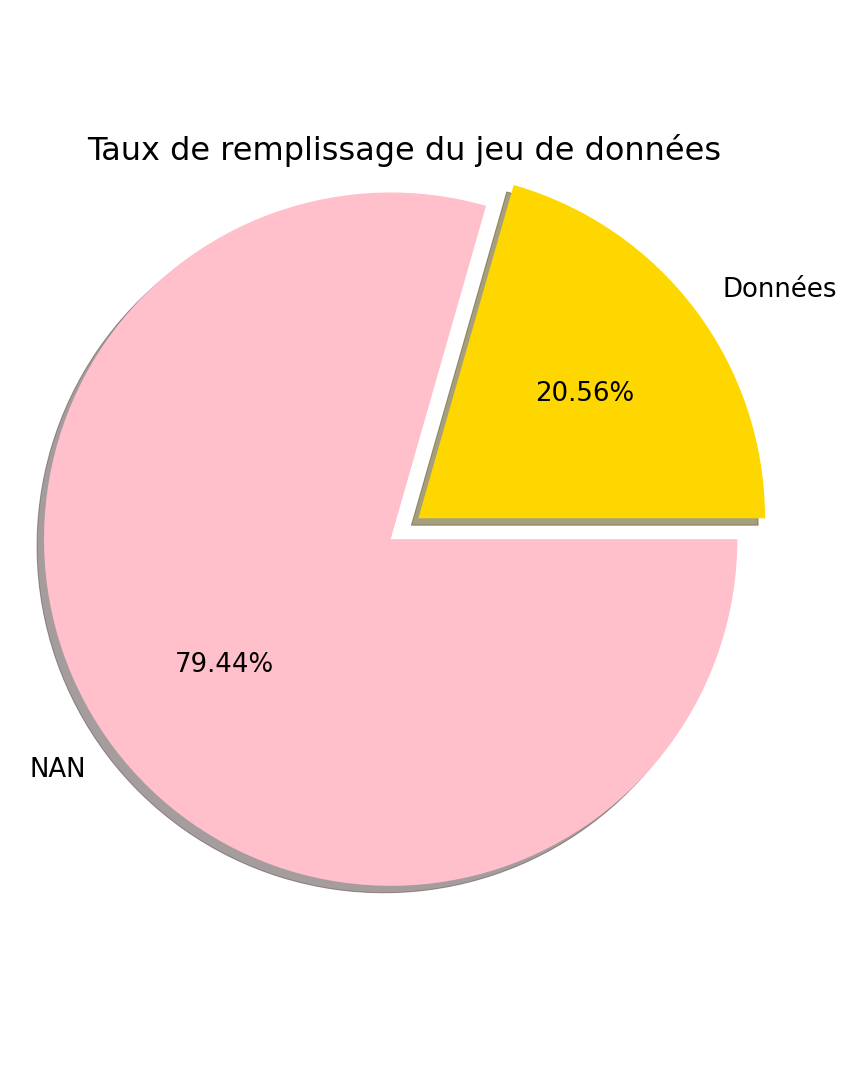

In [ ]:
pie_NaN(data)

Après avoir vu la répartition de nos données manquantes, on peut plus précisément dire que notre jeu de données est composé à 79.44% de données manquantes.  

#### <font color='blue'> **Répartition des données entre les variables des colonnes** </font>

In [ ]:
def graphe_remplissage_variable(dataframe):
  # Répartition du taux de remplissage des colonnes: 
  df = pd.DataFrame(round(dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0],columns=['Taux de remplissage']).sort_values('Taux de remplissage', ascending=False).reset_index()
  fig, ax = plt.subplots(figsize=(10,30))
  sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
  plt.title('Taux de remplissage des variables - %', fontsize = 30)
  plt.show()

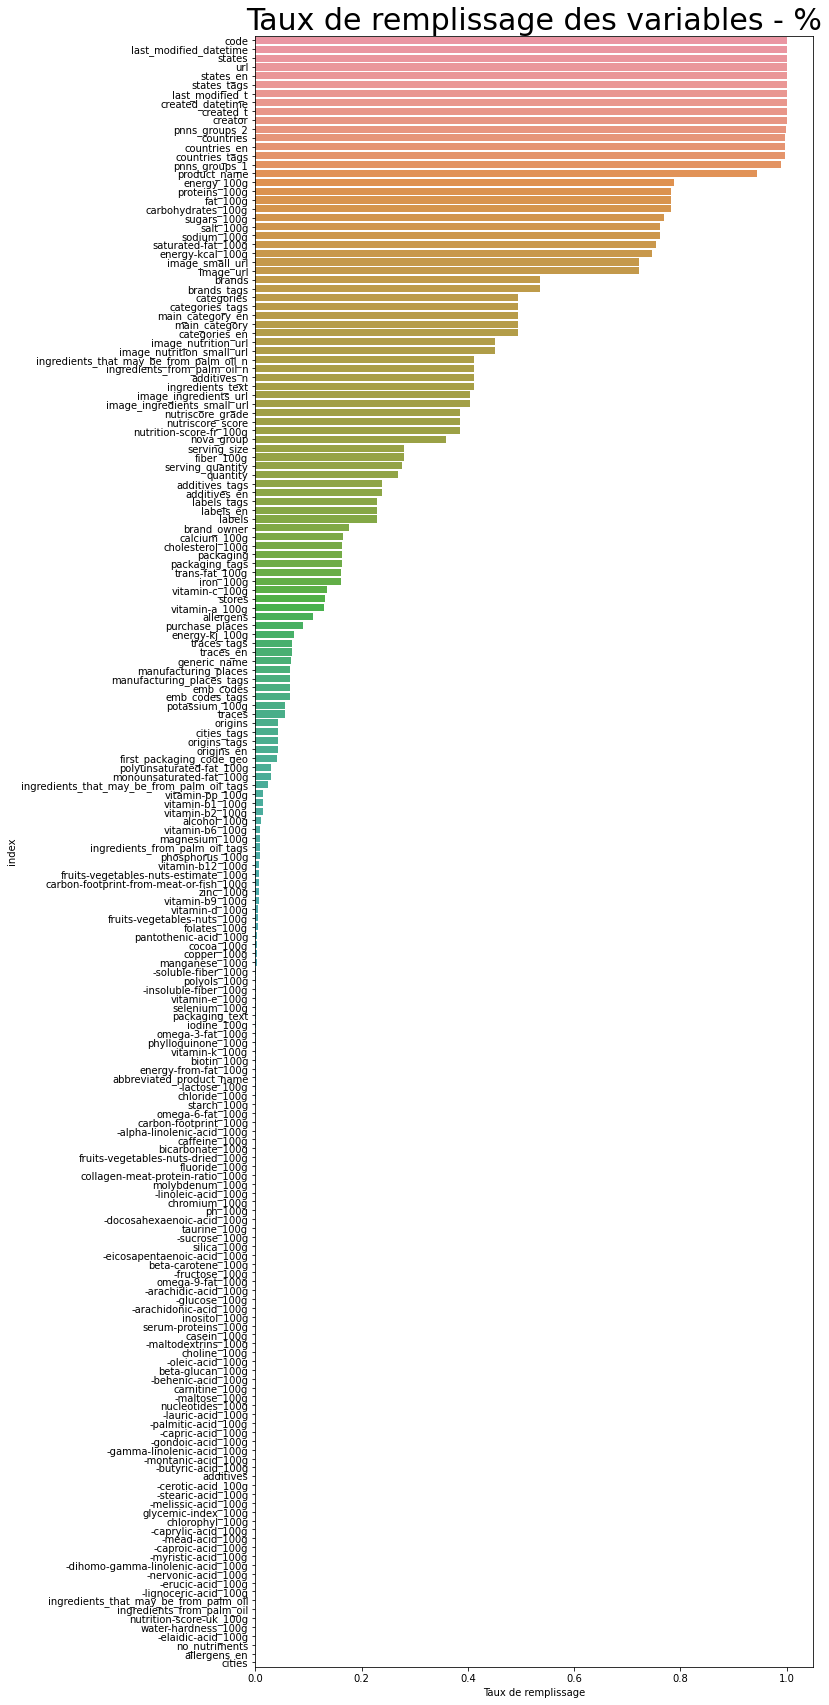

In [ ]:
graphe_remplissage_variable(data)

Dans notre jeu de données, les données ne sont pas réparties de façon égale car peu de colonnes ont un taux de remplissage supérieur à 40 %.

#### <font color='blue'> **Répartition du nutriscore** </font>

In [ ]:
data['nutriscore_grade'].value_counts()

d    195508
c    133376
e    118339
a    101993
b     81593
Name: nutriscore_grade, dtype: int64

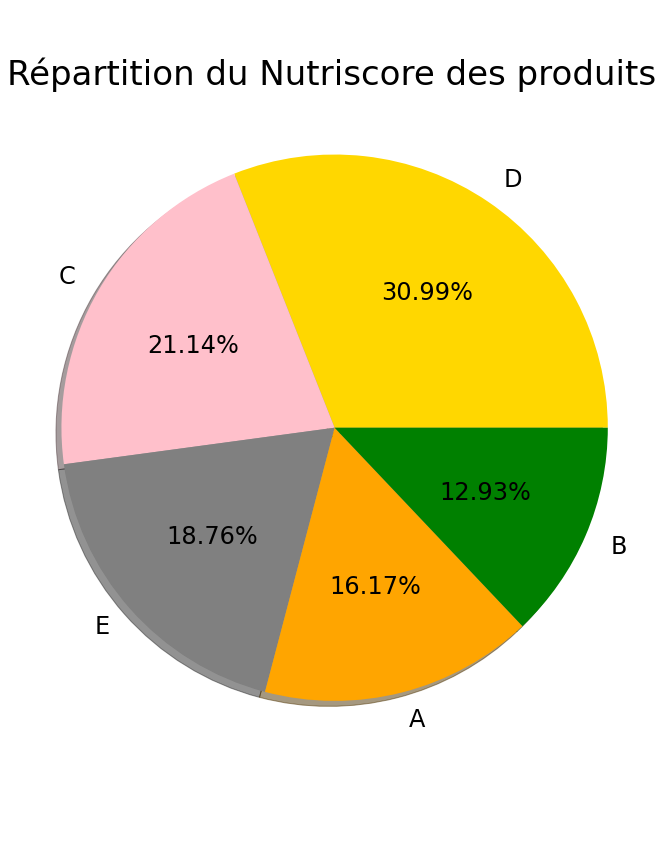

In [ ]:
# Data to plot
values = data['nutriscore_grade'].value_counts()
labels = data['nutriscore_grade'].value_counts().index.str.upper()
colors = ['gold', 'pink', 'grey', 'orange', 'green']
explode =(0, 0, 0, 0, 0) 

# Plot
plt.figure(figsize=(10,12))
plt.pie(values, explode=explode, labels=labels, colors=colors,
autopct='%.2f%%', shadow=True, textprops={'fontsize': 24})

ttl=plt.title("Répartition du Nutriscore des produits", fontsize = 34) 
ttl.set_position([0.5, 0.90])

plt.axis('equal')
plt.tight_layout() 

plt.show()

Dans la base de données mise à notre disposition, les produits que l'on retrouve le plus ont un nutriscore C, D ou E. 

In [ ]:
data['ingredients_from_palm_oil_tags'].unique()

array([nan, 'huile-de-palme', 'stearine-de-palme',
       'stearine-de-palme,oleine-de-palme,huile-de-palme',
       'e304-palmitate-d-ascorbyle', 'oleine-de-palme',
       'huile-de-palme,e304-palmitate-d-ascorbyle',
       'huile-de-palme,stearine-de-palme',
       'e304-palmitate-d-ascorbyle,huile-de-palme',
       'stearine-de-palme,huile-de-palme',
       'e434-monopalmitate-de-polyoxyethylene-sorbitane',
       'huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme',
       'mono-et-diglycerides-d-acides-gras-de-palme',
       'huile-de-palme,oleine-de-palme',
       'mono-et-diglycerides-d-acides-gras-de-palme,huile-de-palme',
       'oleine-de-palme,huile-de-palme',
       'oleine-de-palme,e304-palmitate-d-ascorbyle'], dtype=object)

#### <font color='blue'> **Renommer certaines colonnes** </font>

In [ ]:
#Fonction pour retirer les tirets dans les noms de colonnes
def clean_column_names(dataframe):
  dataframe = dataframe.rename(columns={'fat_100g': 'graisses_100g', 'saturated-fat_100g': 'graisses_saturees_100g',  
                                            'sugars_100g':'sucres_100g', 'proteins_100g':'proteines_100g', 'salt_100g':'sel_100g', 
                                            'sodium_100g':'sodium_100g', 'carbohydrates_100g':'glucides_100g', 'fiber_100g':'fibre_100g'})
  columns = dataframe.columns
  columns_treated = []
  for column in columns:
      if column[0] == '-':
          column = column[1:]
      columns_treated.append(column)
  dataframe.columns = columns_treated
  return dataframe

In [ ]:
data = clean_column_names(data)

In [ ]:
data.shape

(1637297, 184)

## <font color='green'>Création d'un nouveau fichier contenant uniquement les informations qui nous intéressent pour de futures analyses</font>

#### <font color='blue'>**Élimination des données trop grandes ou trop petite**</font>

In [ ]:
cols_100g = ['energy-kj_100g','energy-kcal_100g','energy_100g','energy-from-fat_100g','graisses_100g','graisses_saturees_100g','butyric-acid_100g','caproic-acid_100g',
             'caprylic-acid_100g','capric-acid_100g','lauric-acid_100g','myristic-acid_100g','palmitic-acid_100g','stearic-acid_100g','arachidic-acid_100g','behenic-acid_100g',
             'lignoceric-acid_100g','cerotic-acid_100g','montanic-acid_100g','melissic-acid_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g','omega-3-fat_100g',
             'alpha-linolenic-acid_100g','eicosapentaenoic-acid_100g','docosahexaenoic-acid_100g','omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g','gamma-linolenic-acid_100g',
             'dihomo-gamma-linolenic-acid_100g','omega-9-fat_100g','oleic-acid_100g','elaidic-acid_100g','gondoic-acid_100g','mead-acid_100g','erucic-acid_100g','nervonic-acid_100g',
             'trans-fat_100g','cholesterol_100g','glucides_100g','sucres_100g','sucrose_100g','glucose_100g','fructose_100g','lactose_100g','maltose_100g','maltodextrins_100g','starch_100g',
             'polyols_100g','fibre_100g','soluble-fiber_100g','insoluble-fiber_100g','proteines_100g','casein_100g','serum-proteins_100g','nucleotides_100g','sel_100g','sodium_100g',
             'alcohol_100g','vitamin-a_100g','beta-carotene_100g','vitamin-d_100g','vitamin-e_100g','vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g',
             'vitamin-b6_100g','vitamin-b9_100g','folates_100g','vitamin-b12_100g','biotin_100g','pantothenic-acid_100g','silica_100g','bicarbonate_100g','potassium_100g','chloride_100g',
             'calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','copper_100g','manganese_100g','fluoride_100g','selenium_100g','chromium_100g','molybdenum_100g',
             'iodine_100g','caffeine_100g','taurine_100g','ph_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-dried_100g','fruits-vegetables-nuts-estimate_100g',
             'collagen-meat-protein-ratio_100g','cocoa_100g','chlorophyl_100g','carbon-footprint_100g','carbon-footprint-from-meat-or-fish_100g','nutrition-score-fr_100g',
             'nutrition-score-uk_100g','glycemic-index_100g','water-hardness_100g','choline_100g','phylloquinone_100g','beta-glucan_100g','inositol_100g','carnitine_100g']
for cols in cols_100g:
  if cols != 'energy-kcal_100g' :
    #valeur trop grande
      data.loc[data[cols] > 100, cols] = np.nan
      #valeur trop petite
      data.loc[data[cols] < 0, cols] = np.nan
  else:
    data.drop(data[data[cols] > 8000].index, inplace=True)

In [ ]:
data.shape

(1637262, 184)

#### <font color='blue'>**Élimination des colonnes non-pertinentes pour le projet**</font>



In [ ]:
def remove_columns(dataframe) :
    colonnes = dataframe.columns.tolist()
    columns_to_delete = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 
                         'quantity', 'packaging', 'packaging_text', 'brands', 'categories', 'categories_en', 'emb_codes_tags',
                         'origins', 'origins_en', 'manufacturing_places', 'labels', 'labels_en', 'emb_codes', 'first_packaging_code_geo', 
                         'cities', 'purchase_places', 'stores', 'countries_en', 'ingredients_text', 'allergens_en', 'traces', 'traces_en', 
                         'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_en', 'ingredients_from_palm_oil_n', 
                         'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nova_group', 
                         'states','states_tags', 'states_en', 'brand_owner', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 
                         'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'energy-kj_100g', 'energy_100g', 'energy-from-fat_100g', 
                         'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'cities_tags']


    for column in columns_to_delete:
        try:
            colonnes.remove(column)
        except:
            print('...colonne non présente : ', column)
            print('\n')
    print("Toutes les colonnes présentes ont été suprimées du jeu de données")
    return dataframe[colonnes]

In [ ]:
data_cleaned = remove_columns(data)

Toutes les colonnes présentes ont été suprimées du jeu de données


In [ ]:
data_cleaned.shape

(1637262, 127)

Pour de futures analyses, je décide de garder 126 colonnes sur les 183 que je pouvais avoir au départ.

#### <font color='blue'> **Restriction aux produits vendus en France** </font>

L'appel à projet pour trouver des idées innovantes d’applications en lien avec l'alimentation venant de l'agence "Santé publique France", il ne faut donc garder que les produits vendus en France.

In [ ]:
#récupération des produits vendus en france uniquement mais également des produits vendus en france ainsi que dans d'autres pays
def just_french(dataframe):
  print("Nombre de pays pour la vente de produits alimentaires : {} ".format(len(dataframe.countries.unique().tolist())))
  searchfor = ['Fr', 'fr', "Réunion", "Nouvelle-Calédonie", "Martinique", "Guadeloupe", "Mayotte"]
  dataframe = dataframe[dataframe['countries'].str.contains('|'.join(searchfor),  na = True)]
  print("Nombre de pays associés à la France pour la vente de certains produits alimentaires : {} ".format(len(dataframe[dataframe['countries'].str.contains('|'.join(searchfor),  na = True)].countries.unique().tolist())))
  return dataframe

In [ ]:
short_cleaned = just_french(data_cleaned)

Nombre de pays pour la vente de produits alimentaires : 10009 
Nombre de pays associés à la France pour la vente de certains produits alimentaires : 5289 


Il y a en tout 4 449 associations de pays contenant le mots France sur les 8 782 associations présentes à l'origine.

In [ ]:
short_cleaned.shape

(751637, 127)

Grâce à cette sélection de produits, mon jeu de données passe de 1 555 491 lignes (produits) à 725 575 lignes (produits).

#### <font color='blue'>**Sélecion des lignes qui ont le nom des produits** </font>

In [ ]:
short_cleaned.dropna(subset=['product_name'], inplace=True)
short_cleaned.isna().sum()

code                             0
product_name                     0
abbreviated_product_name    722994
generic_name                649466
packaging_tags              554867
                             ...  
choline_100g                723604
phylloquinone_100g          723607
beta-glucan_100g            723619
inositol_100g               723611
carnitine_100g              723622
Length: 127, dtype: int64

#### <font color='blue'> **Passage du Nutriscore grade en capital** </font>

In [ ]:
def upper_nutriscore(dataframe) :
  dataframe['nutriscore_grade'] = dataframe['nutriscore_grade'].str.upper()
  return dataframe

In [ ]:
short_cleaned = upper_nutriscore(short_cleaned)

#### <font color='blue'> **Répartition du Nutriscore pour les produits vendus en France** </font>

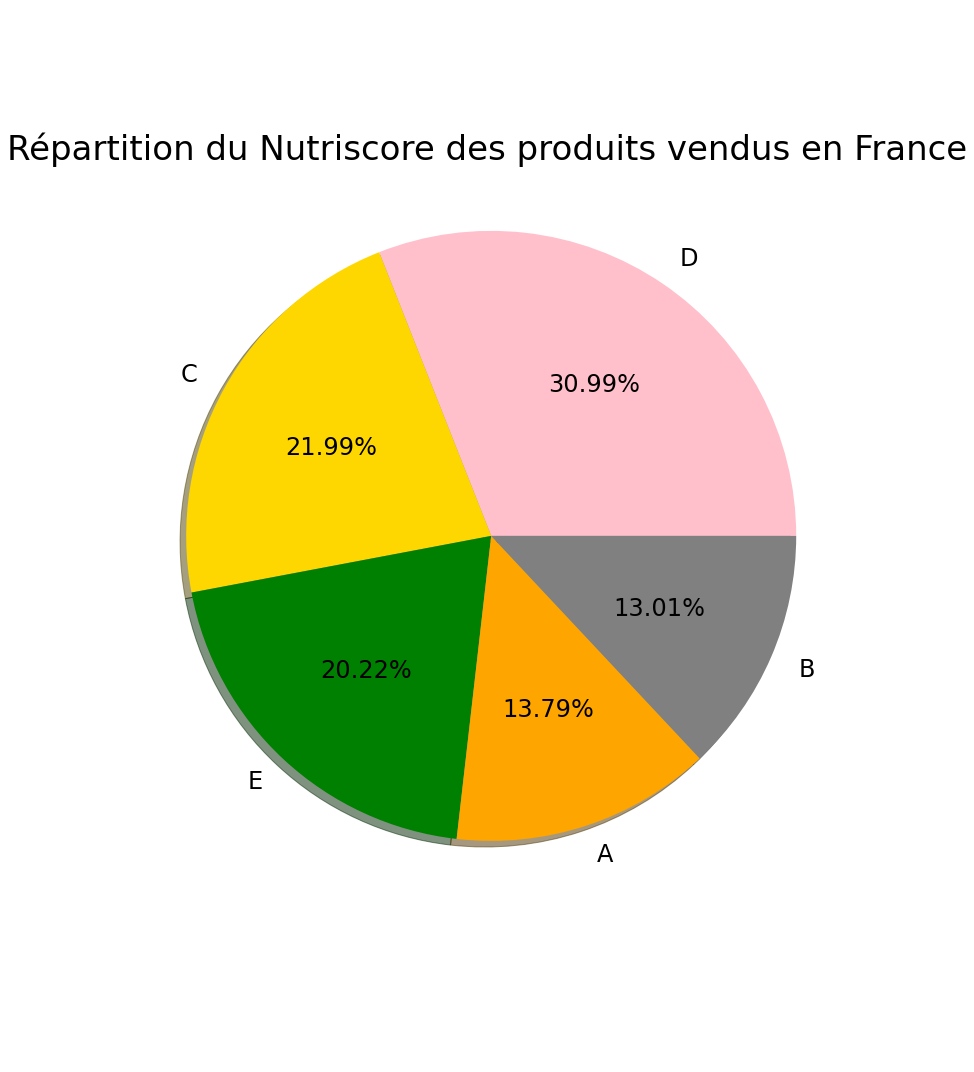

In [ ]:
values = short_cleaned['nutriscore_grade'].value_counts()
labels = ['D', 'C', 'E', 'A', 'B']
explode =(0, 0, 0, 0, 0) 
colors = ['pink', 'gold', 'green', 'orange', 'grey']

# Plot
plt.figure(figsize=(13,15))
plt.pie(values, explode=explode, labels=labels, colors=colors,
autopct='%.2f%%', shadow=True, textprops={'fontsize': 24})

ttl=plt.title("Répartition du Nutriscore des produits vendus en France", fontsize = 34) 
ttl.set_position([0.5, 0.85])

plt.axis('equal')
plt.tight_layout() 

plt.show()

Les produits vendus en France ont essentiellement un nutriscore C, D ou E.

#### <font color='blue'> **Supression des potentiels doublons (Filtrage sur le code-barres EAN-13 (colonne 'code'))** </font>

In [ ]:
def duplicate(dataframe) :
  before = len(dataframe)
  dataframe = dataframe.drop_duplicates(subset='code')
  after = len(dataframe)
  print("Il y a {} duplicats qui ont été retirés du jeu de données" .format(before-after))
  return dataframe

In [ ]:
short_data_cleaned = duplicate(short_cleaned)

Il y a 1 duplicats qui ont été retirés du jeu de données


In [ ]:
list(short_data_cleaned.columns)

['code',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'packaging_tags',
 'brands_tags',
 'categories_tags',
 'origins_tags',
 'manufacturing_places_tags',
 'labels_tags',
 'countries',
 'countries_tags',
 'allergens',
 'traces_tags',
 'additives_tags',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutriscore_score',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'energy-kcal_100g',
 'graisses_100g',
 'graisses_saturees_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_10

#### <font color='blue'> **Données manquantes dans ce nouveau jeu de données** </font>

Le jeux de données est rempli à 12.32%
et il a 87.68% de données manquantes
 
 


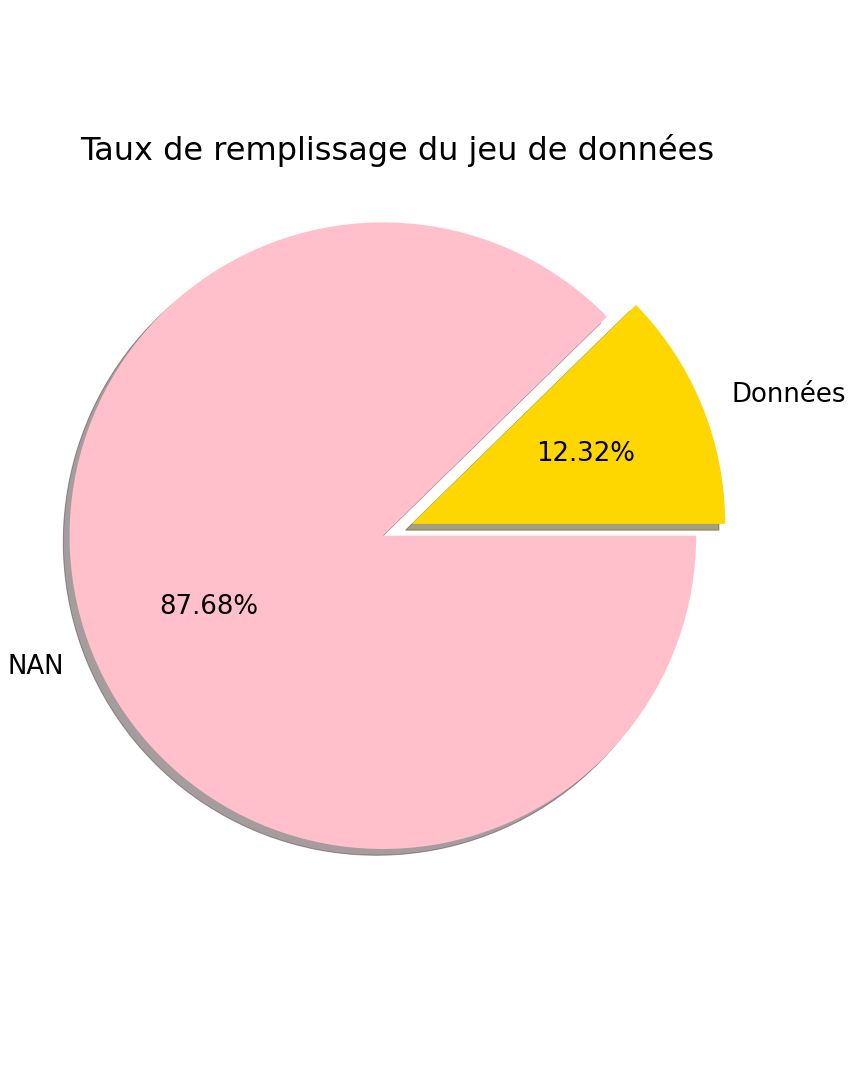

In [ ]:
pie_NaN(short_data_cleaned)

A la suite de la filtration effectuée sur les colonnes et les lignes, il y a 87,7% de données manquantes dans le nouveau dataset. Ce pourcentage peut s'expliquer par la supression de colonnes qui était totalement remplies mais qui ne nous seront pas utiles (telles que l'url des images pour les pages web) et du fait que de nombreux produits non vendus en France ont été supprimés.

Pour diminuer le taux de NaN, on supprimera des colonnes dont le taux de remplissage est trop faible pour être fiable pour nos études futures.

#### <font color='blue'> **Suppression des colonnes qui ont un taux de données manquantes supérieures à une limite** </font>

In [ ]:
def filtration_colonnes(dataframe, taux_remplissage):
    dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)
    indexes = []
    #nombre de colonnes à l'origine
    nb_colonne = dataframe.shape[1]
    for col_name in dataframe.columns.tolist():
      if (col_name == 'product_name'):
        pass
      elif (col_name == 'nutriscore_score'):
        pass
      elif (col_name == 'nutriscore_grade'):
        pass
      elif (col_name == 'packaging_tags'):
        pass
      elif (col_name == 'brands_tags'):
        pass      
      elif (col_name == 'origins_tags'):
        pass 
      elif (col_name == 'manufacturing_places_tags'):
        pass 
      elif (col_name == 'labels_tags'):
        pass 
      elif (col_name == 'countries_tags'):
        pass 
      elif (col_name == 'traces_tags'):
        pass 
      elif (col_name == 'additives_tags'):
        pass 
      elif (col_name == 'ingredients_from_palm_oil_tags'):
        pass 
      elif (col_name == 'ingredients_that_may_be_from_palm_oil_tags'):
        pass 
      elif (col_name == 'fibre_100g'):
        pass
      else :
        taux_data_colonne = (dataframe[col_name].shape[0] - dataframe[col_name].isna().sum())/dataframe[col_name].shape[0]  # taux de remplissage pour chaque colonne : (nombredeligne-nombredeNANparcolonne)/nombredeligne
        if taux_data_colonne < taux_remplissage:   #Filtration des colonnes dont le remplissage est supérieur à la limite
          dataframe.drop(col_name, axis = 1, inplace=True) 
    #nombre de colonnes au final
    nb_colonne_supp = nb_colonne - dataframe.shape[1]

    print("Avec cette fonction, 13 variables sont obligatoirement gardées")
    print("Nombre de colonnes avec un taux de remplissage supérieur à {:.2%} : {} colonnes.".format(taux_remplissage, dataframe.shape[1]))
    print("Nombre de colonnes supprimées : {} colonnes".format(nb_colonne_supp))
    print(" ")
    print(" ")

    return dataframe


    


In [ ]:
short_clean = filtration_colonnes(short_data_cleaned, 0.50)
short_clean

Avec cette fonction, 13 variables sont obligatoirement gardées
Nombre de colonnes avec un taux de remplissage supérieur à 50.00% : 26 colonnes.
Nombre de colonnes supprimées : 101 colonnes
 
 


,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,graisses_100g,graisses_saturees_100g,glucides_100g,sucres_100g,fibre_100g,proteines_100g,sel_100g,sodium_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,NaN,courte-paille,NaN,NaN,fr:delois-france,France,en:france,NaN,NaN,NaN,NaN,18.0,D,Fat and sauces,Dressings and sauces,NaN,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840
4,00000000001111111111,Sfiudwx,NaN,watt,NaN,NaN,NaN,en:France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,21.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637286,9999999004360,Minis beignets,NaN,NaN,NaN,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,15.0,D,unknown,unknown,333.0,20.2,6.00,30.9,10.4,NaN,7.4,1.10,0.440
1637289,99999995,Steak haché pur boeuf,NaN,NaN,NaN,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,-2.0,A,Fish Meat Eggs,Meat,131.0,5.0,2.30,0.0,0.0,NaN,21.5,0.18,0.072
1637293,999999999,Thé noir BIO Darjeeling,NaN,pages,NaN,NaN,NaN,en:france,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637295,9999999999994,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,en:france,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,0.0,0.2,0.10,8.0,7.8,NaN,5.5,0.15,0.060


Le taux de remplisage des colonnes choisi est de 50% de façon à avoir le plus de données réelles possibles ainsi que des variables utiles pour l'exploration.

In [ ]:
short_clean.isna().sum()

code                                               0
product_name                                       0
packaging_tags                                554867
brands_tags                                   320257
origins_tags                                  677620
manufacturing_places_tags                     656398
labels_tags                                   490221
countries                                       3708
countries_tags                                  3708
traces_tags                                   647970
additives_tags                                597674
ingredients_from_palm_oil_tags                712056
ingredients_that_may_be_from_palm_oil_tags    702029
nutriscore_score                              457807
nutriscore_grade                              457807
pnns_groups_1                                   9974
pnns_groups_2                                      0
energy-kcal_100g                              176858
graisses_100g                                 

#### <font color='blue'> **Homogénéisation des types pour les colonnes** </font>

In [ ]:
short_clean.columns

Index(['code', 'product_name', 'packaging_tags', 'brands_tags', 'origins_tags',
       'manufacturing_places_tags', 'labels_tags', 'countries',
       'countries_tags', 'traces_tags', 'additives_tags',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
       'energy-kcal_100g', 'graisses_100g', 'graisses_saturees_100g',
       'glucides_100g', 'sucres_100g', 'fibre_100g', 'proteines_100g',
       'sel_100g', 'sodium_100g'],
      dtype='object')

In [ ]:
short_clean.dtypes

code                                           object
product_name                                   object
packaging_tags                                 object
brands_tags                                    object
origins_tags                                   object
manufacturing_places_tags                      object
labels_tags                                    object
countries                                      object
countries_tags                                 object
traces_tags                                    object
additives_tags                                 object
ingredients_from_palm_oil_tags                 object
ingredients_that_may_be_from_palm_oil_tags     object
nutriscore_score                              float64
nutriscore_grade                               object
pnns_groups_1                                  object
pnns_groups_2                                  object
energy-kcal_100g                              float64
graisses_100g               

In [ ]:
def nettoyage_types(dataframe):
  category_features = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'nova_group', 'nutriscore_grade']
  bool_features = ['ingredients_that_may_be_from_palm_oil']
  float_features = ['cities', 'allergens_en', 'serving_quantity', 'no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'energy_100g', 'energy-from-fat_100g', 'graisses_100g', 'graisses_saturees_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'glucides_100g', 'sucres_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteines_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'sel_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g']
  object_features = ['code', 'url', 'cities', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives', 'additives_tags', 'additives_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url']

  for feature in category_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('category')

  for feature in bool_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('bool')

  for feature in float_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('float64')

  for feature in object_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('object')

  return dataframe

In [ ]:
short_clean = nettoyage_types(short_clean)

In [ ]:
short_clean.dtypes

code                                            object
product_name                                    object
packaging_tags                                  object
brands_tags                                     object
origins_tags                                    object
manufacturing_places_tags                       object
labels_tags                                     object
countries                                       object
countries_tags                                  object
traces_tags                                     object
additives_tags                                  object
ingredients_from_palm_oil_tags                  object
ingredients_that_may_be_from_palm_oil_tags      object
nutriscore_score                               float64
nutriscore_grade                              category
pnns_groups_1                                   object
pnns_groups_2                                   object
energy-kcal_100g                               float64
graisses_1

#### <font color='blue'> **Traitement des colonnes "Tags"** </font>


In [ ]:
def categorize(chaine, mapping):
    group = 'autre'
    for key in mapping:
        if key in str(chaine):
            group = mapping[key]
            break
    return group

def traitement_tags(dataframe):

    mapping = {'plastique' : 'plastique',
                            'kunststoff' : 'plastique',
                            'sachet' : 'plastique',
                            'verre' : 'verre',
                            'carton' : 'carton',
                            'plastique' : 'plastique',
                            'conserve' : 'conserve'}

    dataframe['packaging_tags'] = dataframe['packaging_tags'].apply(categorize, args=[mapping])
    dataframe['packaging_tags'] = dataframe['packaging_tags'].astype('category')
    
    mapping = {'carrefour' : 'carrefour',
          'auchan' : 'auchan',
          'leader-price' : 'leader-price',
          'delhaize' : 'delhaize',
          'casino' : 'casino',
          'nestle' : 'nestle',
          'cora' : 'cora',
          'hacendado' : 'hacendado'}
    dataframe['brands_tags'] = dataframe['brands_tags'].apply(categorize, args=[mapping])
    dataframe['brands_tags'] =dataframe['brands_tags'].astype('category')
    

    mapping = {'france' : 'france',
              'italie' : 'italie',
              'belgique' : 'belgique',
              'deutschland' : 'allemagne',
              'suisse' : 'suisse',
              'allemagne' : 'allemagne',
              'mexico' : 'mexique',
              'espana' : 'espagne'}
    dataframe['origins_tags'] = dataframe['origins_tags'].apply(categorize, args=[mapping])
    dataframe['origins_tags'] = dataframe['origins_tags'].astype('category')

    mapping = {'france': 'france',
          'italie': 'italie',
          'belgique':'belgique',
          'deutschland' : 'allemagne',
          'suisse':'suisse',
          'allemagne' : 'allemagne',
          'mexico' : 'mexique',
           'espana' : 'espagne',
           'espagne' : 'espagne'
          }
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].apply(categorize, args=[mapping])
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].astype('category')

               
    mapping = {'organic' : 'bio',
           'gluten-free' : 'sans gluten',
           'biologique' : 'bio',
            'green-dot' : 'recyclable',
           'vegan' : 'vegan',
           'vegetarian' : 'vegetarien',
           'france' : 'made in france',
           'no-preservatives' : 'sans conservateur',
           'no-colorings' : 'sans colorants',
           'no-added-sugar' : 'sans sucre ajouté'
          }
    dataframe['labels_tags'] = dataframe['labels_tags'].apply(categorize, args=[mapping])
    dataframe['labels_tags'] = dataframe['labels_tags'].astype('category')
        
    mapping = {'france': 'france'}
    dataframe['countries_tags'] = dataframe['countries_tags'].apply(categorize, args=[mapping])
    dataframe['countries_tags'] = dataframe['countries_tags'].astype('category')    
        
    mapping = {'nuts' : 'arachides',
           'milk' : 'lait',
           'gluten' : 'gluten',
           'soybeans' : 'graines de soja',
           'peanuts' : 'arachides',
          'eggs' : 'oeufs'}
    dataframe['traces_tags'] = dataframe['traces_tags'].apply(categorize, args=[mapping])
    dataframe['traces_tags'] = dataframe['traces_tags'].astype('category')
    
    mapping = {'en:e330' : 'E330',
               'en:e322' : 'E322/E322I',
               'en:e322i' : 'E322/E322I',
               'en:e440' : 'E440/E440I' ,
               'en:e440i' : 'E440/E440I',
               'en:e415' : 'E415',
               'en:e300' : 'E300',
               'en:e14xx' : 'E14XX',
               'en:e407' : 'E407',
               'en:E250' : 'E250',
               'en:E316' : 'E316'}
    dataframe['additives_tags'] = dataframe['additives_tags'].apply(categorize, args=[mapping])
    dataframe['additives_tags'] = dataframe['additives_tags'].astype('category')
    
      
    mapping = {'huile-de-palme' : 'huile-de-palme',
           'e304-palmitate-d-ascorbyle' : 'E304',
           'palme' : 'huile-de-palme'}
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].astype('category')
     
      
    mapping = {'e471-mono-et-diglycerides-d-acides-gras-alimentaires' : 'E471',
           'huile végétale' : 'huile végétale',
           'e160a-beta-carotene' : 'e160a-beta-carotene',
           'e433-monooleate-de-polyoxyethylene-de-sorbitane' : 'E433',
           'e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras' : 'E472',
           'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium' : 'E471'}
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].astype('category')
      
    
    return dataframe

In [ ]:
short_clean = traitement_tags(short_clean)

In [ ]:
short_clean['packaging_tags'].unique()

['autre', 'plastique', 'verre', 'carton', 'conserve']
Categories (5, object): ['autre', 'plastique', 'verre', 'carton', 'conserve']

#### <font color='blue'> **Impact de la supression des colonnes peu remplies sur le taux de données manquantes** </font>

In [ ]:
short_clean.shape

(723635, 26)

Le jeux de données est rempli à 85.49%
et il a 14.51% de données manquantes
 
 


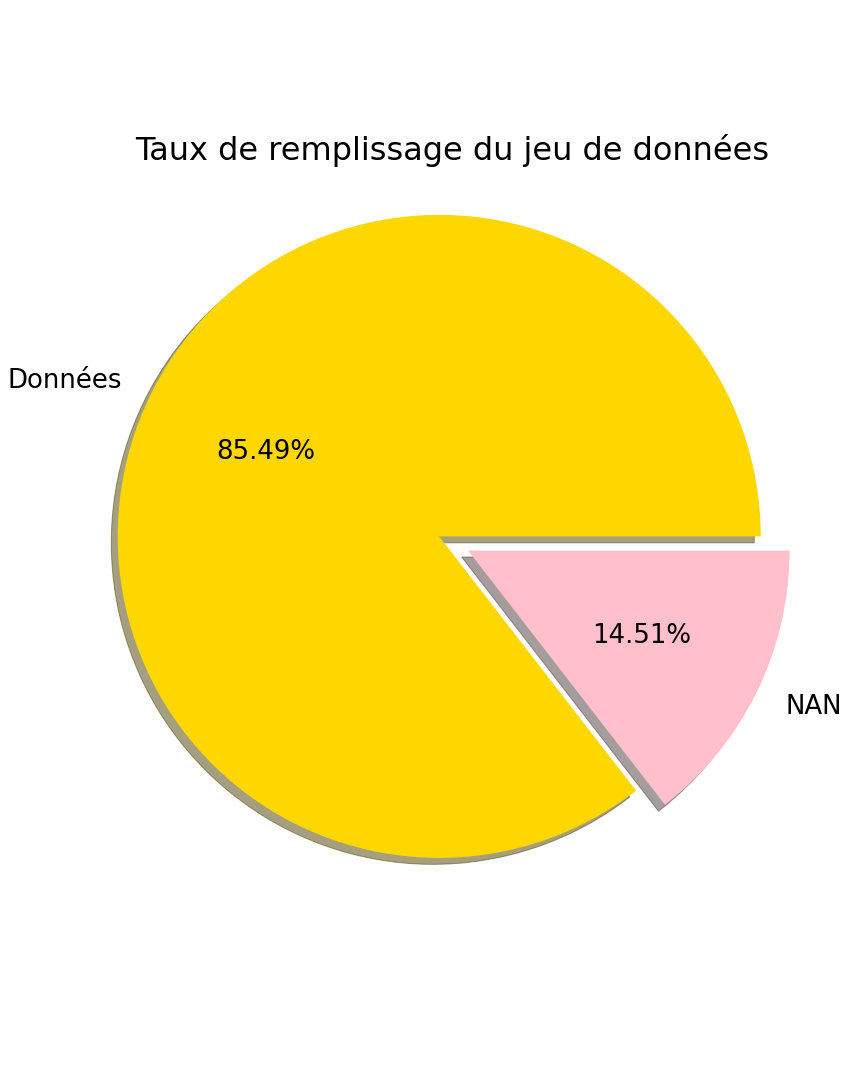

In [ ]:
pie_NaN(short_clean)

On remarque que le fait de supprimer des colonnes peu remplies fait passer le taux de données manquantes de 79,4% à 14,5 %. Pour nos analyses futures, il serait intéressant de voir si il est possible de diminuer ce pourcentage pour avoir des variables totalement complètes. Pour celà, il faut imputer nos variables numériques.

In [ ]:
short_clean.head()

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,graisses_100g,graisses_saturees_100g,glucides_100g,sucres_100g,fibre_100g,proteines_100g,sel_100g,sodium_100g
0,0000000000017,Vitória crackers,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560
1,0000000000031,Cacao,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,autre,autre,autre,autre,made in france,France,france,autre,autre,autre,autre,18.0,D,Fat and sauces,Dressings and sauces,NaN,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840
4,00000000001111111111,Sfiudwx,autre,autre,autre,autre,autre,en:France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,Sauce Sweety chili 0%,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,21.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816


#### <font color='blue'> **Imputation du nutriscore** </font>

In [ ]:
short_clean.shape

(723635, 26)

Calcul du nutriscore si il est NaN mais que les composants de base ont une valeur.

Points négatifs : l'énergie, les graisses saturées, les sucres, et le sodium (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).

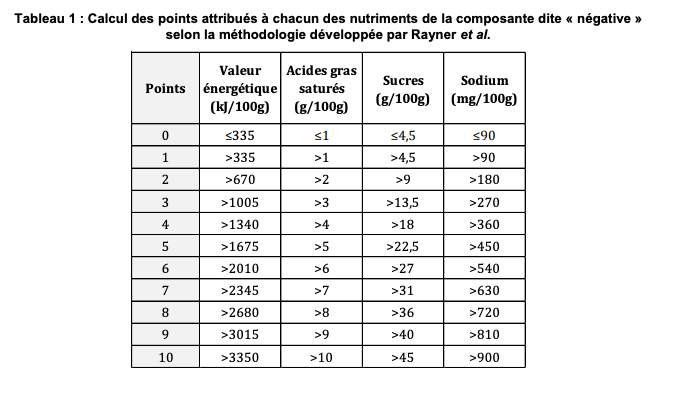

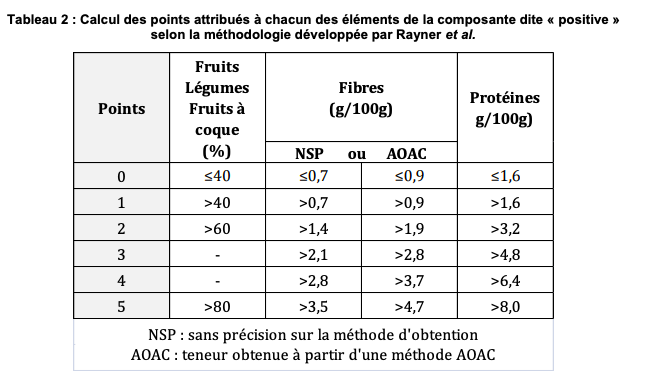

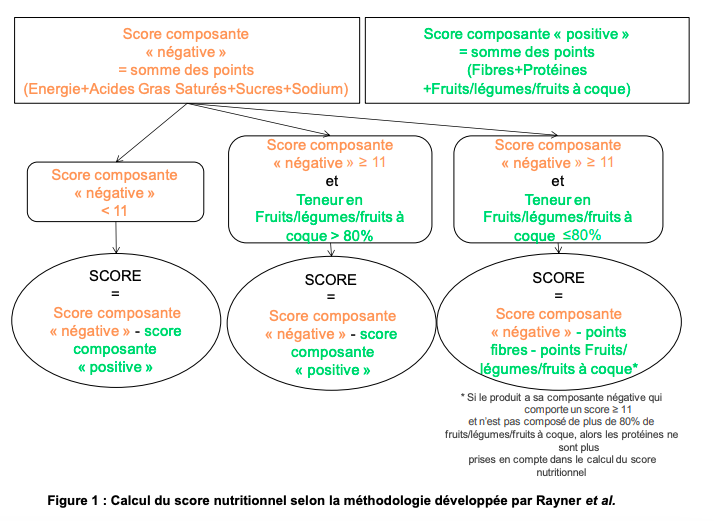

In [ ]:
def nutri_calcul(row):
    """Fonction calculant le nutrition_score"""
    nutrition_score = 0    
    
    # Si toutes les valeurs sont NaN, calcul nutriscore impossible:
    x = np.isnan(row['sucres_100g'])
    y = np.isnan(row['energy-kcal_100g']) 
    z = np.isnan(row['graisses_saturees_100g'])
    w = np.isnan(row['sodium_100g'])
    u = np.isnan(row['fibre_100g'])
    t = np.isnan(row['proteines_100g'])
    if (t & u & w & x & y & z):
      return None

    # Calcul des points des composantes "négatives":

    x = row['energy-kcal_100g']
    energy=0
    if (x<=335):
        energy = 0
    elif (x>335) & (x<=670):
        energy = 1
    elif (x>670) & (x<=1005):
        energy = 2
    elif (x>1005) & (x<=1340):
        energy = 3
    elif (x>1340) & (x<=1675):
        energy = 4
    elif (x>1675) & (x<=2010):
        energy = 5
    elif (x>2010) & (x<=2345):
        energy = 6
    elif (x>2345) & (x<=2680):
        energy = 7
    elif (x>2680) & (x<=3015):
        energy = 8
    elif (x>3015) & (x<=3350):
        energy = 9
    elif (x>3350):
        energy = 10  


    x = row['graisses_saturees_100g']
    saturees=0
    if (x<=1):
        saturees = 0
    elif (x>1) & (x<=2):
        saturees = 1
    elif (x>2) & (x<=3):
        saturees = 2
    elif (x>3) & (x<=4):
        saturees = 3
    elif (x>4) & (x<=5):
        saturees = 4
    elif (x>5) & (x<=6):
        saturees = 5
    elif (x>6) & (x<=7):
        saturees = 6
    elif (x>7) & (x<=8):
        saturees = 7
    elif (x>8) & (x<=9):
        saturees = 8
    elif (x>9) & (x<=10):
        saturees = 9
    elif (x>10):
        saturees = 10 


    x = row['sucres_100g']
    sucres=0
    if (x<=4.5):
        sucres = 0
    elif (x>4.5) & (x<=9):
        sucres = 1
    elif (x>9) & (x<=13.5):
        sucres = 2
    elif (x>13.5) & (x<=18):
        sucres = 3
    elif (x>18) & (x<=22.5):
        sucres = 4
    elif (x>22.5) & (x<=27):
        sucres = 5
    elif (x>27) & (x<=31):
        sucres = 6
    elif (x>31) & (x<=36):
        sucres = 7
    elif (x>36) & (x<=40):
        sucres = 8
    elif (x>40) & (x<=45):
        sucres = 9
    elif (x>45):
        sucres = 10   

    x = row['sodium_100g']
    sodium=0
    if (x<=0.09):
        sodium = 0
    elif (x>0.09) & (x<=0.18):
        sodium = 1
    elif (x>0.18) & (x<=0.27):
        sodium = 2
    elif (x>0.27) & (x<=0.36):
        sodium = 3
    elif (x>0.36) & (x<=0.45):
        sodium = 4
    elif (x>0.45) & (x<=0.54):
        sodium = 5
    elif (x>0.54) & (x<=0.63):
        sodium = 6
    elif (x>0.63) & (x<=0.72):
        sodium = 7
    elif (x>0.72) & (x<=0.81):
        sodium = 8
    elif (x>0.81) & (x<=0.9):
        sodium = 9
    elif (x>0.9):
        sodium = 10  

    #Somme des composantes négatives pour le nutriscore    
    negatives = energy + saturees + sucres + sodium      
    


    # Calcul des points des composantes "positives":
    x = row['fibre_100g']
    fibre=0
    if (x<=0.7):
        fibre = 0
    elif (x>0.7) & (x<=1.4):
        fibre = 1
    elif (x>1.4) & (x<=2.1):
        fibre = 2
    elif (x>2.1) & (x<=2.8):
        fibre = 3
    elif (x>2.8) & (x<=3.5):
        fibre = 4
    elif (x>3.5):
        fibre = 5   
            
    x = row['proteines_100g']
    proteines=0
    if (x<=1.6):
        proteines = 0
    elif (x>1.6) & (x<=3.2):
        proteines = 1
    elif (x>3.2) & (x<=4.8):
        proteines = 2
    elif (x>4.8) & (x<=6.4):
        proteines = 3
    elif (x>6.4) & (x<=8):
        proteines = 4
    elif (x>8):
        proteines = 5        
    
    positives = fibre + proteines
    
    #Calcul du nutrition_score:     
    nutrition_score = negatives - positives
        
    return nutrition_score

In [ ]:
def impute_nutrition_score (dataframe):

  orig = dataframe['nutriscore_score'].isna().sum()

  for i, row in dataframe[dataframe['nutriscore_score'].isnull()].iterrows():  # i: dataframe index; row: chaque ligne (row) au format series
    nutri=nutri_calcul(row)
    dataframe.loc[i,'nutriscore_score']=nutri

  print('Nombre de lignes corrigées: ', orig-dataframe['nutriscore_score'].isna().sum())

Séparation du jeu de données en sous jeu de données pour faciliter le calcul.

In [ ]:
df_split= np.array_split(short_clean, 8)
df1=df_split[0]
df2=df_split[1]
df3=df_split[2]
df4=df_split[3]
df5=df_split[4]
df6=df_split[5]
df7=df_split[6]
df8=df_split[7]

In [ ]:
impute_nutrition_score(df1)

Nombre de lignes corrigées:  40813


In [ ]:
impute_nutrition_score(df2)

Nombre de lignes corrigées:  40183


In [ ]:
impute_nutrition_score(df3)

Nombre de lignes corrigées:  28277


In [ ]:
impute_nutrition_score(df4)

Nombre de lignes corrigées:  37839


In [ ]:
impute_nutrition_score(df5)

Nombre de lignes corrigées:  36340


In [ ]:
impute_nutrition_score(df6)

Nombre de lignes corrigées:  44681


In [ ]:
impute_nutrition_score(df7)

Nombre de lignes corrigées:  49759


In [ ]:
impute_nutrition_score(df8)

Nombre de lignes corrigées:  50413


Nombre total de nutrition_score imputés : 

In [ ]:
40813 + 40183 + 28277 + 37839 + 36340 + 44681 + 49759 + 50413

328305

Grâce à cette méthode, il a été possible d'imputer et compléter 328 305 nutriscores.

Concaténation des sous datasets après imputation

In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8]

cleaning_data = pd.concat(frames)

vérifions que la taille soit identique avant et après imputation

In [ ]:
cleaning_data.shape

(723635, 26)

OK, pas de perte de ligne

#### <font color='blue'>**Sélecion des lignes qui ont un nutriscore** </font>

In [ ]:
cleaning_data.isna().sum()

code                                               0
product_name                                       0
packaging_tags                                     0
brands_tags                                        0
origins_tags                                       0
manufacturing_places_tags                          0
labels_tags                                        0
countries                                       3708
countries_tags                                     0
traces_tags                                        0
additives_tags                                     0
ingredients_from_palm_oil_tags                     0
ingredients_that_may_be_from_palm_oil_tags         0
nutriscore_score                              129502
nutriscore_grade                              457807
pnns_groups_1                                   9974
pnns_groups_2                                      0
energy-kcal_100g                              176858
graisses_100g                                 

In [ ]:
cleaning_data.dropna(subset=['nutriscore_score'], inplace=True)
cleaning_data.isna().sum()

code                                               0
product_name                                       0
packaging_tags                                     0
brands_tags                                        0
origins_tags                                       0
manufacturing_places_tags                          0
labels_tags                                        0
countries                                       1983
countries_tags                                     0
traces_tags                                        0
additives_tags                                     0
ingredients_from_palm_oil_tags                     0
ingredients_that_may_be_from_palm_oil_tags         0
nutriscore_score                                   0
nutriscore_grade                              328305
pnns_groups_1                                   2238
pnns_groups_2                                      0
energy-kcal_100g                               47356
graisses_100g                                 

In [ ]:
cleaning_data.shape

(594133, 26)

### <font color='blue'>**Imputation des valeurs numériques NaN**</font>

#### <font color='purple'>**Essai d'Imputation par la méthode des K voisins (KNN) sur un sous jeu de données**</font>

In [ ]:
extract_short_cleaned = cleaning_data.select_dtypes(['int64','float64']).head(20000)

In [ ]:
extract_short_cleaned.select_dtypes(['int64','float64']).isna().sum()

nutriscore_score       13117
energy-kcal_100g        4634
graisse_100g            4513
graisse_sature_100g     4508
carbohydrates_100g      4536
sucre_100g              4499
proteine_100g           4454
sel_100g                4813
sodium_100g             4813
dtype: int64

In [ ]:
extract_short_cleaned.select_dtypes(['int64','float64'])

,nutriscore_score,energy-kcal_100g,graisse_100g,graisse_sature_100g,carbohydrates_100g,sucre_100g,proteine_100g,sel_100g,sodium_100g
0,NaN,375.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,NaN,8.2,2.20,29.0,22.0,5.1,4.60,1.840
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,21.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816
...,...,...,...,...,...,...,...,...,...
258971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le jeux de données est rempli à 72.28%
et il a 27.71% de données manquantes
 
 


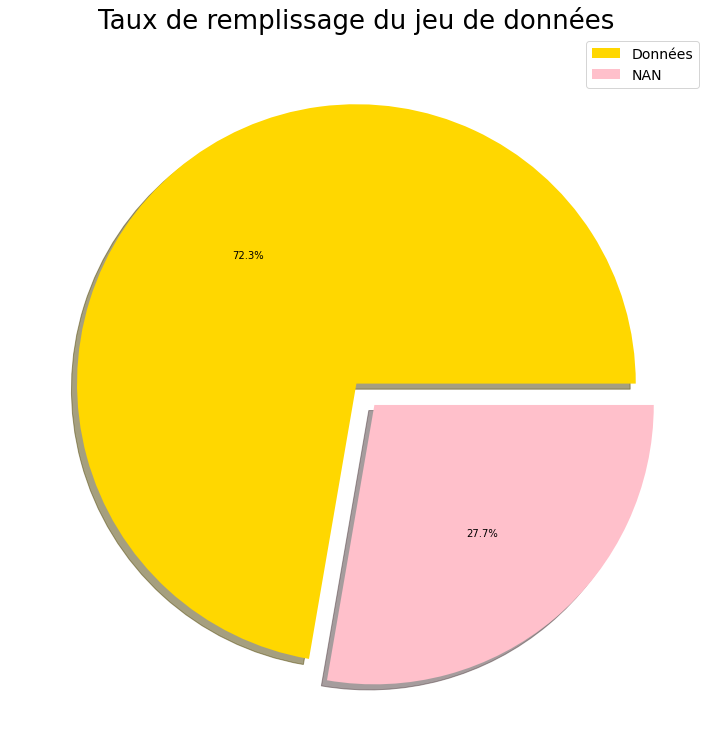

In [ ]:
pie_NaN(extract_short_cleaned)

Dans notre sous-jeu de données, il y a 27,7 % de données manquantes. Voyons si la méthode d'imputation des k voisins permet de diminuer ce taux.

Choix du nombre de K voisins grâce à la fonction optimize_k qui calcule pour chaque voisin le RMSE (c’est la racine carrée de la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations, qui est à minimiser).

La cellule cible choisie est proteine_100g car il s'agit de la variable avec le moins de données manquantes.


In [ ]:
def rmse(predictions, targets):

    differences = predictions - targets                       

    differences_squared = differences ** 2                    

    mean_of_differences_squared = differences_squared.mean()  

    rmse_val = np.sqrt(mean_of_differences_squared)          

    return rmse_val                                           

In [ ]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        print(k)
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        #error = rmse(y_test, preds)
        error = mean_squared_error(y_test, preds, squared=False)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [ ]:
k_errors = optimize_k(data=extract_short_cleaned.select_dtypes(['int64','float64']), target='proteine_100g')
k_errors

1
3
5
7
9
11
13
15
17
19


[{'K': 1, 'RMSE': 4.680383626123308},
 {'K': 3, 'RMSE': 4.127276921352311},
 {'K': 5, 'RMSE': 4.347023018199086},
 {'K': 7, 'RMSE': 4.44037406368533},
 {'K': 9, 'RMSE': 4.350524625004824},
 {'K': 11, 'RMSE': 4.352114785164293},
 {'K': 13, 'RMSE': 4.278078649907036},
 {'K': 15, 'RMSE': 4.317147646703644},
 {'K': 17, 'RMSE': 4.435713869668451},
 {'K': 19, 'RMSE': 4.292014354146762}]

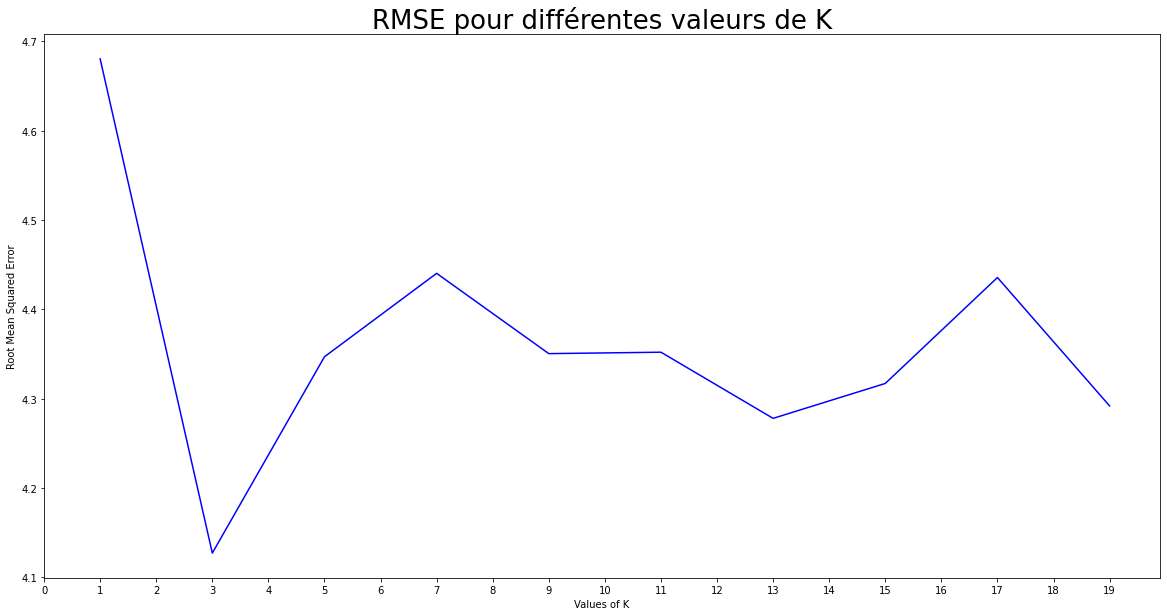

In [ ]:
df = pd.DataFrame(k_errors)
plt.figure(figsize = (20,10))
plt.plot(df['K'], df['RMSE'], 'b-')
plt.title("RMSE pour différentes valeurs de K", fontsize = 26) 
plt.xlabel('Values of K')
plt.ylabel('Root Mean Squared Error')
plt.xticks(np.arange(0, 20, 1))
plt.show()

Grâce à ce graphique, il est possible de dire que le nombre de voisins à choisir pour l'imputation est 3.

In [ ]:
def impute_KNN(dataframe, k):
    df = dataframe.select_dtypes(['int64','float64'])
    imputer = KNNImputer(n_neighbors=k)
    imputed = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(imputed, columns=df.columns)
    return df_imputed

In [ ]:
short_cleaned_impute = impute_KNN(extract_short_cleaned, 3)

In [ ]:
short_cleaned_impute.head()

,nutriscore_score,energy-kcal_100g,graisse_100g,graisse_sature_100g,carbohydrates_100g,sucre_100g,proteine_100g,sel_100g,sodium_100g
0,2.333333,375.000000,7.000000,3.08000,70.100000,15.000000,7.800000,1.400000,0.56000
1,10.148191,269.648265,11.915525,4.42479,34.052124,17.098817,6.646479,2.118492,0.84707
2,18.000000,143.333333,8.200000,2.20000,29.000000,22.000000,5.100000,4.600000,1.84000
3,10.148191,269.648265,11.915525,4.42479,34.052124,17.098817,6.646479,2.118492,0.84707
4,1.000000,21.000000,0.000000,0.00000,4.800000,0.400000,0.200000,2.040000,0.81600


Le jeux de données est rempli à 100.00%
et il a 0.00% de données manquantes
 
 


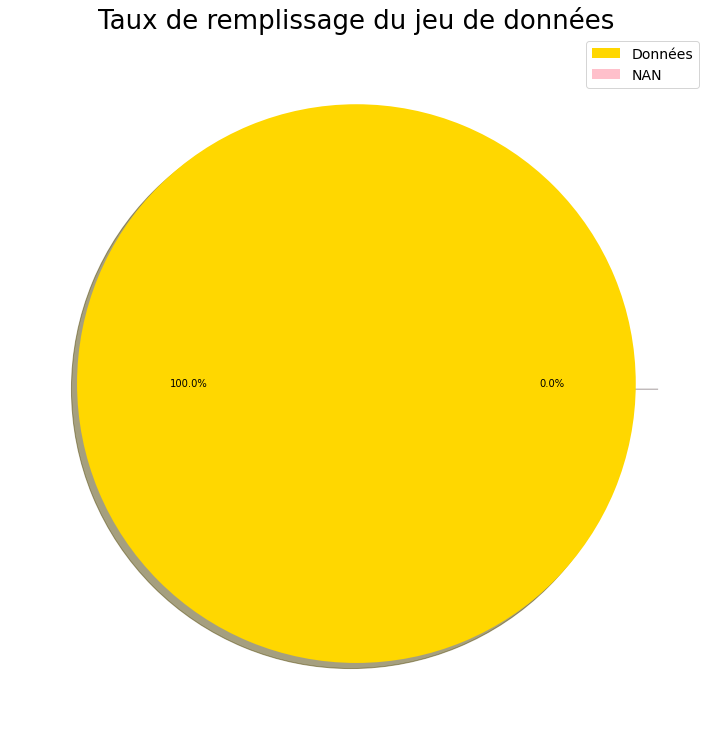

In [ ]:
pie_NaN(short_cleaned_impute)

Après l'imputation par la méthode KNN, il n'y a plus de donnée manquante.

Suite à un problème de performance, cette méthode  ne peut pas être exécutée en totalité. Pour continuer nos analyses, l'imputation des NaN se fera grâce à la fonction interpolate de pandas.

#### <font color='purple'>**Imputation par la méthode interpolate de pandas**</font>

##### <font color='red'>**Imputation**</font>

In [ ]:
#Imputation avec pandas 
def imputation_pandas(dataframe):
  short_cleaned_impute = dataframe.copy()
  for col_name in dataframe.select_dtypes(include = ['int64','float64']).columns.tolist():
    print(col_name)
    short_cleaned_impute[col_name] = dataframe[col_name].interpolate(method='linear', inplace=False, limit_direction="both").ffill().bfill()
  return short_cleaned_impute

In [ ]:
short_cleaned_imputed = imputation_pandas(cleaning_data)
short_cleaned_imputed

nutriscore_score
energy-kcal_100g
graisses_100g
graisses_saturees_100g
glucides_100g
sucres_100g
fibre_100g
proteines_100g
sel_100g
sodium_100g


,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,graisses_100g,graisses_saturees_100g,glucides_100g,sucres_100g,fibre_100g,proteines_100g,sel_100g,sodium_100g
0,0000000000017,Vitória crackers,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,9.0,NaN,unknown,unknown,375.0,7.0,3.08,70.10,15.00,0.000000,7.8,1.400,0.560
3,0000000000100,moutarde au moût de raisin,autre,autre,autre,autre,made in france,France,france,autre,autre,autre,autre,18.0,D,Fat and sauces,Dressings and sauces,198.0,8.2,2.20,29.00,22.00,0.000000,5.1,4.600,1.840
5,0000000000123,Sauce Sweety chili 0%,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,9.0,NaN,unknown,unknown,21.0,0.0,0.00,4.80,0.40,0.254545,0.2,2.040,0.816
6,0000000000178,Mini coco,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,4.0,NaN,unknown,unknown,60.0,3.0,1.00,10.00,3.00,0.509091,2.0,1.150,0.460
11,000000000075,Sachet calisson,autre,autre,autre,autre,autre,en:fr,france,autre,autre,autre,autre,0.0,NaN,unknown,unknown,61.5,1.5,0.50,12.75,9.25,0.763636,1.1,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637281,9999991087217,Pastilles à l'eau de lourdes,autre,autre,autre,autre,autre,en:fr,france,autre,autre,autre,autre,11.0,NaN,unknown,unknown,397.0,0.0,0.00,99.00,99.00,0.000000,0.2,0.095,0.038
1637282,9999991149090,Riz parfumé,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,0.0,B,Cereals and potatoes,Cereals,351.0,0.5,0.00,80.00,0.00,0.000000,7.0,0.000,0.000
1637286,9999999004360,Minis beignets,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,15.0,D,unknown,unknown,333.0,20.2,6.00,30.90,10.40,0.000000,7.4,1.100,0.440
1637289,99999995,Steak haché pur boeuf,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,-2.0,A,Fish Meat Eggs,Meat,131.0,5.0,2.30,0.00,0.00,0.000000,21.5,0.180,0.072


##### <font color='red'>**Effet de l'imputation sur quelques variables numériques**</font>

  

Traitement de la variable  nutriscore_score
Moyenne (Avant / Après) :  9.149876585092874  /  7.4200692437551865
Ecart-Type (Avant / Après) :  8.904560094293464  /  7.79022099400987
  

Traitement de la variable  energy-kcal_100g
Moyenne (Avant / Après) :  275.1346920468922  /  275.50182477326223
Ecart-Type (Avant / Après) :  200.76696153204378  /  195.53359715116025
  

Traitement de la variable  graisses_100g
Moyenne (Avant / Après) :  13.682814783293889  /  14.043577734298777
Ecart-Type (Avant / Après) :  17.661835063106913  /  17.36456435818897
  

Traitement de la variable  graisses_saturees_100g
Moyenne (Avant / Après) :  5.162381175795631  /  5.372839395285948
Ecart-Type (Avant / Après) :  7.830307685097116  /  7.933772534765316
  

Traitement de la variable  glucides_100g
Moyenne (Avant / Après) :  28.258156981076507  /  27.147388891742114
Ecart-Type (Avant / Après) :  28.12389952756165  /  27.665157977803357
  

Traitement de la variable  sucres_100g
Moyenne (Avant / Après)

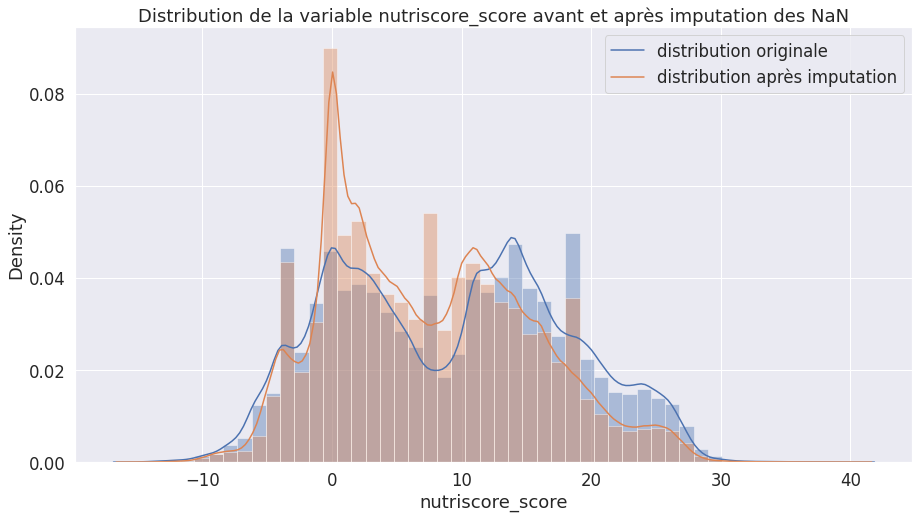

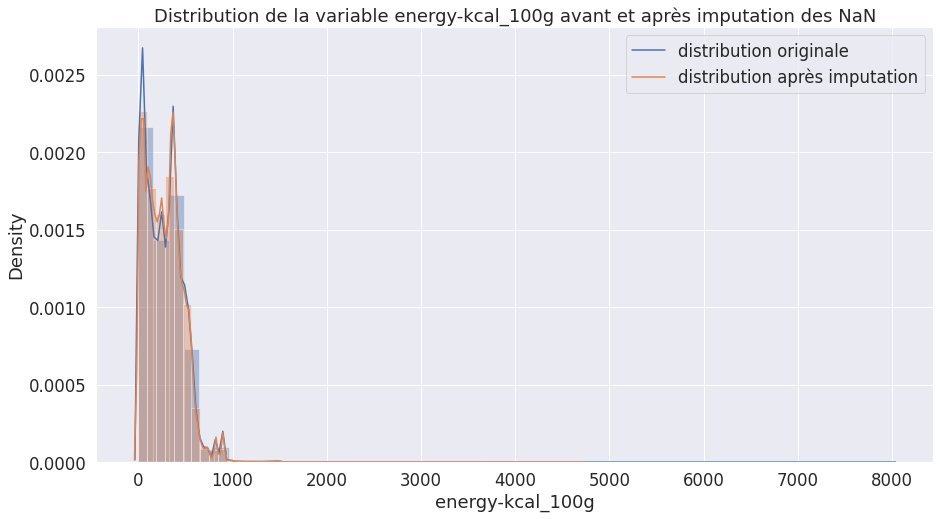

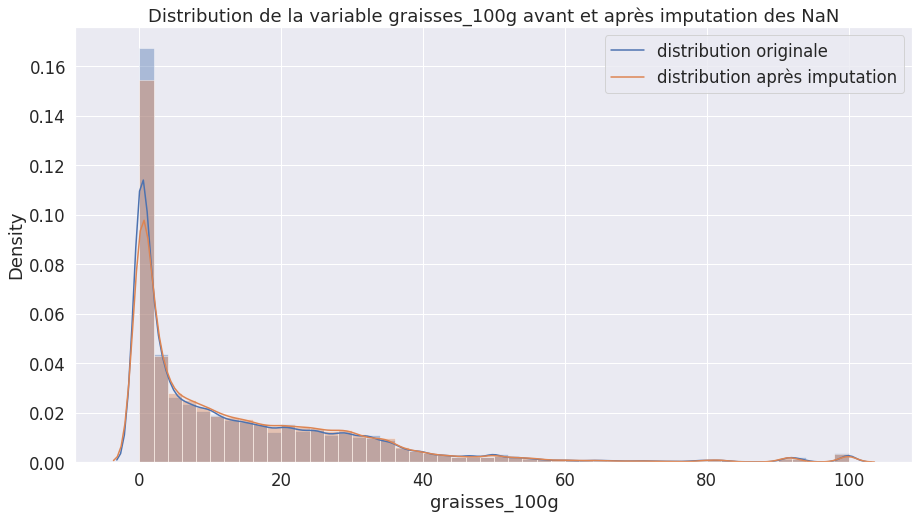

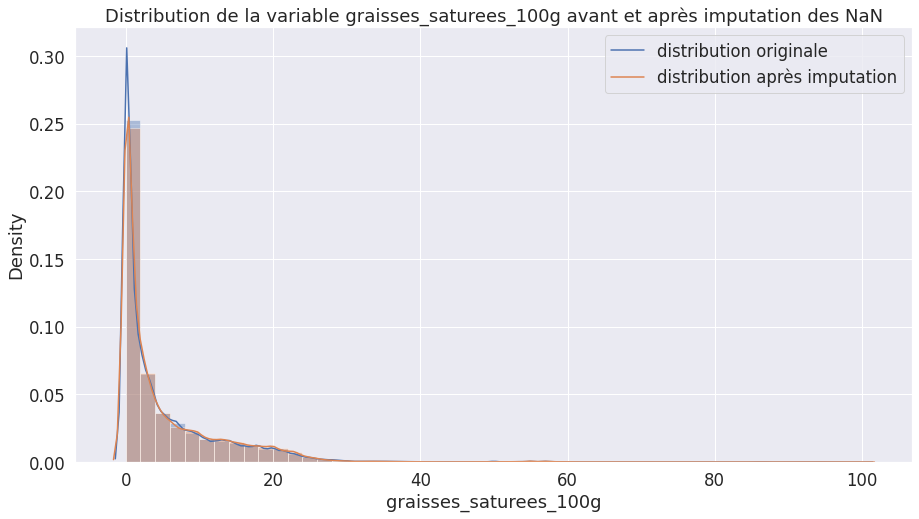

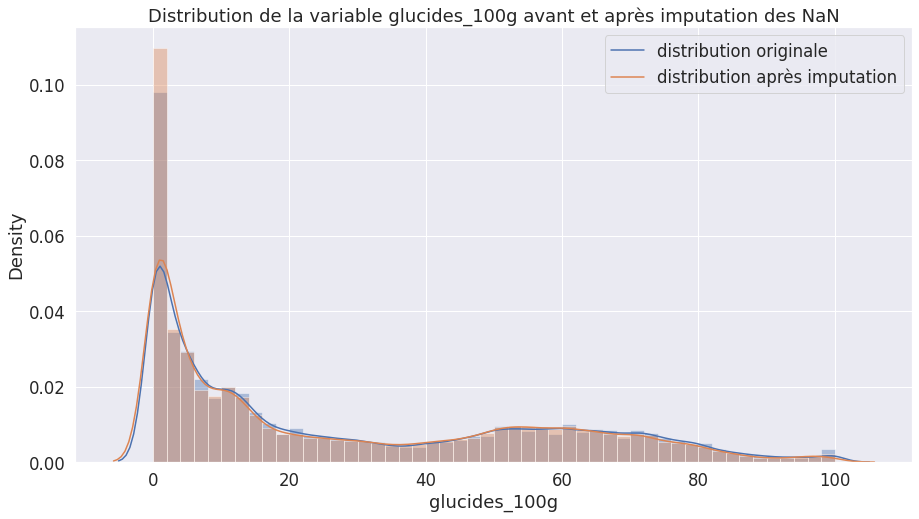

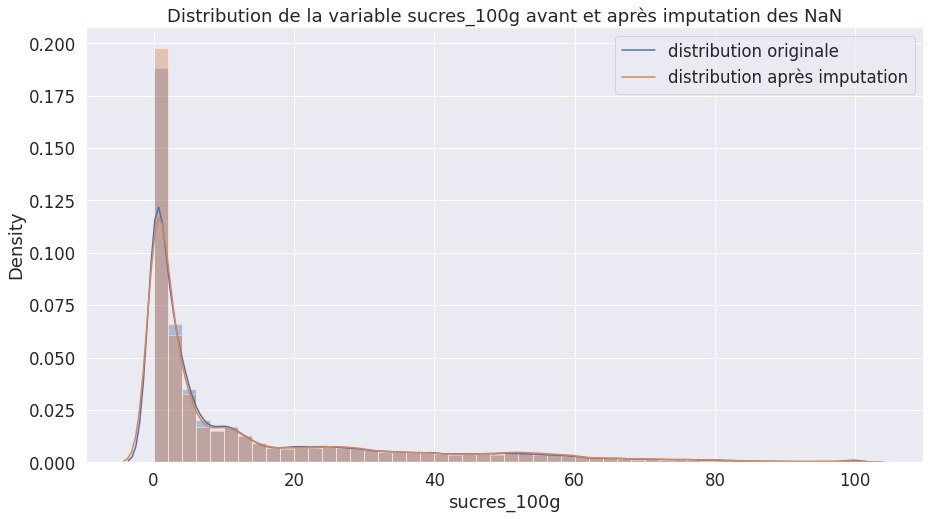

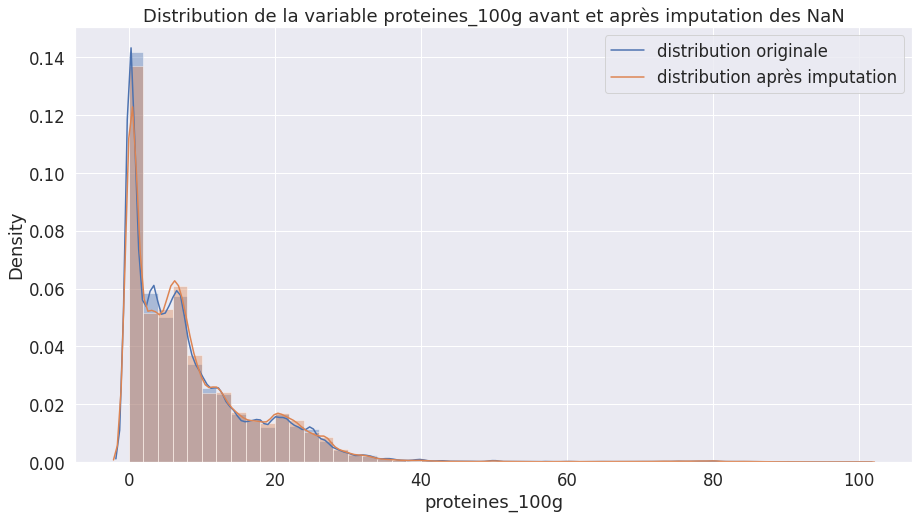

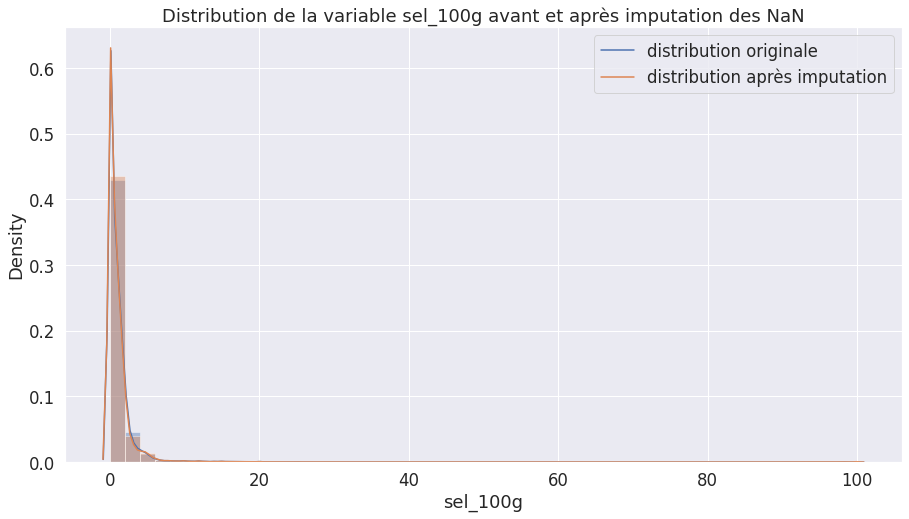

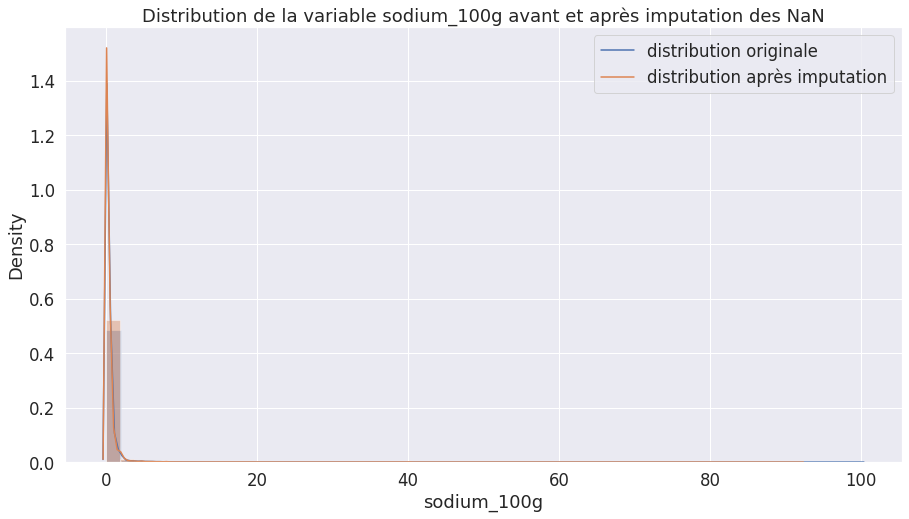

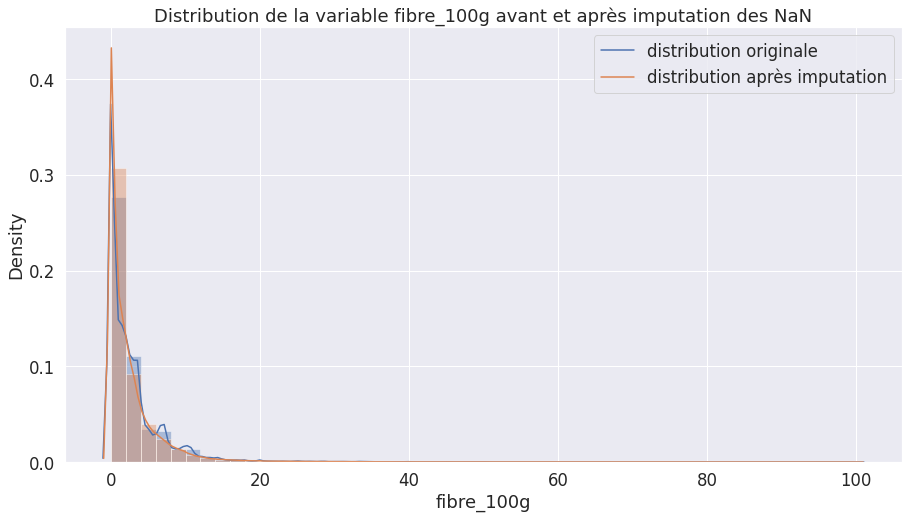

In [ ]:
sns.set(font_scale=1.5)
for column in ['nutriscore_score','energy-kcal_100g', 'graisses_100g',
       'graisses_saturees_100g', 'glucides_100g', 'sucres_100g', 'proteines_100g',
       'sel_100g', 'sodium_100g', 'fibre_100g']:

    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(data[column].dropna())
    sns.distplot(short_cleaned_imputed[column].dropna())
    plt.legend(['distribution originale', 'distribution après imputation'])

    print("  ")
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', data[column].dropna().mean(), ' / ', short_cleaned_imputed[column].mean())
    print('Ecart-Type (Avant / Après) : ', data[column].dropna().std(), ' / ', short_cleaned_imputed[column].std())

sns.set(font_scale=1)

Les graphes sont difficiles à lire sans suppression des outliers mais pour le nutriscore qui est visble, les allures des distributions sont très proches. Lorsque l'on regarde l'impact de l'imputation sur la moyenne et l'écart type, on constate que pour toutes les variables, les moyennes, avant et après imputation, sont proches entre elles et que l'écart type a été amélioré, il a diminué, ce qui traduit le fait que les données imputées sont moins dispersées que les données originales.

##### <font color='red'>**Taux de données manquantes après l'imputation**</font>

Le jeux de données est rempli à 97.85%
et il a 2.15% de données manquantes
 
 


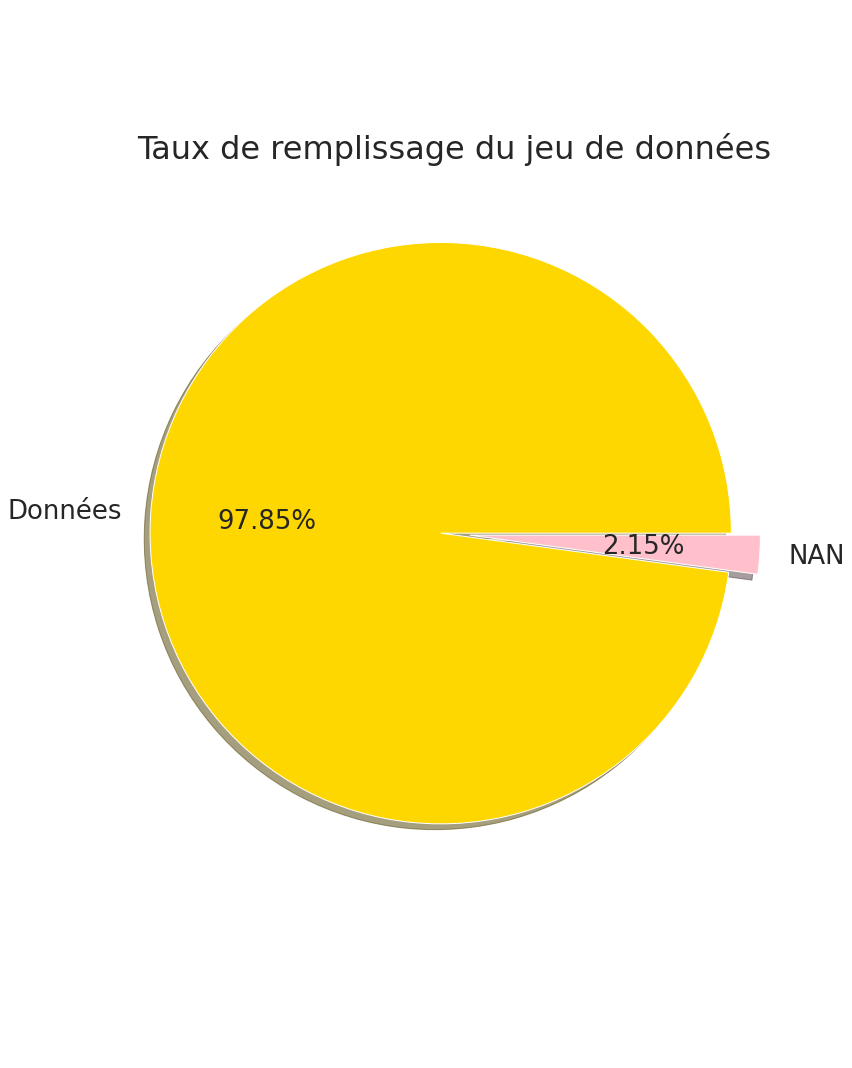

In [ ]:
pie_NaN(short_cleaned_imputed)

In [ ]:
short_cleaned_imputed.isna().sum()

code                                               0
product_name                                       0
packaging_tags                                     0
brands_tags                                        0
origins_tags                                       0
manufacturing_places_tags                          0
labels_tags                                        0
countries                                       1983
countries_tags                                     0
traces_tags                                        0
additives_tags                                     0
ingredients_from_palm_oil_tags                     0
ingredients_that_may_be_from_palm_oil_tags         0
nutriscore_score                                   0
nutriscore_grade                              328305
pnns_groups_1                                   2238
pnns_groups_2                                      0
energy-kcal_100g                                   0
graisses_100g                                 

A la suite de notre imputation, nous avons encore 2,2% de données manquantes mais ces données manquantes correspondent aux variables countries, nutriscore_grade et pnns_groups_1. Cependant, on peut remarquer que toutes les variables numériques ont bien été imputées et il n'y a plus de donnée manquante dans ces colonnes.

### <font color='blue'>**Supression des outliers : diverses méthodes** </font>

Une valeur aberrante est une observation qui diffère des autres observations.

Il n'existe pas de moyen précis de définir et d'identifier les valeurs aberrantes en raison des spécificités de chaque ensemble de données. Différentes méthodes statistiques permettent d'identifier les observations qui semblent rares ou improbables compte tenu des données disponibles.


In [ ]:
short_cleaned_imputed.shape

(594133, 26)

In [ ]:
short_cleaned_imputed.describe()

,nutriscore_score,energy-kcal_100g,graisses_100g,graisses_saturees_100g,glucides_100g,sucres_100g,fibre_100g,proteines_100g,sel_100g,sodium_100g
count,594133.000000,594133.000000,594133.000000,594133.000000,594133.000000,594133.000000,594133.000000,594133.000000,594133.000000,594133.000000
mean,7.420069,275.501825,14.043578,5.372839,27.147389,13.764561,2.636198,8.800651,1.235867,0.496701
std,7.790221,195.533597,17.364564,7.933773,27.665158,20.012282,4.688680,9.913599,4.396311,1.798765
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,112.000000,1.000000,0.200000,2.700000,0.615000,0.000000,1.500000,0.050000,0.020000
50%,6.000000,262.000000,7.900000,2.000000,14.000000,3.500000,1.200000,6.100000,0.500000,0.200000
75%,13.000000,399.000000,22.000000,7.900000,52.000000,20.000000,3.250000,12.600000,1.300000,0.520000
max,40.000000,4700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,92.000000


#### <font color='purple'>**Méthode d'écart-type**</font>

La première méthode est d'utiliser l'écart type.

##### <font color='red'>**Standard 3 deviation**</font>

In [ ]:
def remove_3deviation(df_in, n):
  indexes_outliers = [] 
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist(): #itération sur les colonnes contenant des valeurs numériques
    print('colonne ', col_name)
    upper_limit = df_in[col_name].mean() + 3*df_in[col_name].std()
    #print(upper_limit)
    lower_limit = df_in[col_name].mean() -3*df_in[col_name].std()
    #print(lower_limit)
    list_outliers = df_in[(df_in[col_name]>upper_limit) | (df_in[col_name]<lower_limit)].index
    print("Now remove these outliers and generate new dataframe")
    indexes_outliers.extend(list_outliers) # ajout des index des outliers trouvés à la liste dejà crée

  indexes_outliers = Counter(indexes_outliers)  #conteneur qui garde en mémoire le nombre de fois qu'est ajoutée chaque observation
  multiple_outliers = list( k for k, v in indexes_outliers.items() if v > n )  # sélection des observation qui apparaissent plus de n fois
  #print(multiple_outliers)
  #print("Remove outlier")
  df_no_outlier12 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  return df_no_outlier12

In [ ]:
df_out_remove_3deviation = remove_3deviation(short_cleaned_imputed, 1)

colonne  nutriscore_score
Now remove these outliers and generate new dataframe
colonne  energy-kcal_100g
Now remove these outliers and generate new dataframe
colonne  graisses_100g
Now remove these outliers and generate new dataframe
colonne  graisses_saturees_100g
Now remove these outliers and generate new dataframe
colonne  glucides_100g
Now remove these outliers and generate new dataframe
colonne  sucres_100g
Now remove these outliers and generate new dataframe
colonne  fibre_100g
Now remove these outliers and generate new dataframe
colonne  proteines_100g
Now remove these outliers and generate new dataframe
colonne  sel_100g
Now remove these outliers and generate new dataframe
colonne  sodium_100g
Now remove these outliers and generate new dataframe


In [ ]:
df_out_remove_3deviation.shape

(582324, 26)

Avec cette méthode, il y a 7 357 outliers supprimés.


##### <font color='red'>**Z-score**</font>

In [ ]:
short_cleaned_imputed.shape

(594133, 26)

In [ ]:
def remove_zscore(df_in, n):
  indexes = [] 
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist():
    if col_name != 'zscore':
      print('colonne ', col_name)
      df_in['zscore'] = ( df_in[col_name] - df_in[col_name].mean() ) / df_in[col_name].std()
      df_in[df_in['zscore']>3]
      df_in[df_in['zscore']<-3]

      list_outliers = df_in[(df_in.zscore<-3) | (df_in.zscore>3)].index 
      indexes.extend(list_outliers)
    else:
      break

  indexes = Counter(indexes)
  multiple_outliers = list( k for k, v in indexes.items() if v > n ) 
  df_no_outliers3 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  df_in = df_in.drop(columns=['zscore'], inplace=True)
  df_no_outliers3 = df_no_outliers3.drop(columns=['zscore'])

  return df_no_outliers3

In [ ]:
df_out_remove_zscore = remove_zscore(short_cleaned_imputed, 1)

colonne  nutriscore_score
colonne  energy-kcal_100g
colonne  graisses_100g
colonne  graisses_saturees_100g
colonne  glucides_100g
colonne  sucres_100g
colonne  fibre_100g
colonne  proteines_100g
colonne  sel_100g
colonne  sodium_100g


In [ ]:
df_out_remove_zscore.shape

(582324, 26)

Avec cette méthode, il y a 7 357 outliers supprimés.

##### <font color='red'>**Peut-on se fier à ces méthodes ? (Non)**</font>

La condition principale et essentielle pour l'utilisation de ces deux méthodes est le fait que nos variables doivent suivre une distribution gaussienne (loi Normale).

Standard 3 deviation : La distribution gaussienne a pour propriété que l'écart-type par rapport à la moyenne peut être utilisé pour résumer de manière fiable le pourcentage de valeurs dans l'échantillon.
Trois écarts-types par rapport à la moyenne sont un seuil commun dans la pratique pour identifier les valeurs aberrantes dans une distribution gaussienne.

Z-score : Il indique l'écart type d'un échantillon donné. Ce score aide à déterminer si une valeur est plus grande ou plus petite que la moyenne de la variable et de combien la valeur est éloignée de la moyenne. Plus précisément, le Z-score nous dit de combien de standard déviation la valeur est éloignée de la moyenne.

Z score = (x-mean) / std.deviation

Si le Z-score d'une valeur est supérieur à 3, cela indique que le point de données est très différent des autres points de données et cette valeur peut être considérée comme abhérante. 

<font color='red'>Vérifions si nos données suivent une distribution normale</font>


In [ ]:
def verif_normalite (dataframe):
  numeric_columns = dataframe.select_dtypes(include = ['int64','float64']).columns
  numeric_columns = numeric_columns[1:]
  for column in numeric_columns:
      print('__\n{}'.format(column))
      k2, p = stats.normaltest(short_cleaned[column], 
                               axis=0,
                               nan_policy = 'omit')
      alpha = 5e-2
      print("p = {:g}".format(p))
      if p < alpha:  # null hypothese: x a une distribution normale
          print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
      else:
          print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

In [ ]:
gauss = verif_normalite(short_cleaned_imputed)

__
energy-kcal_100g
p = 0
H0 est rejetée : energy-kcal_100g n'est pas de distribution normale
__
graisses_100g
p = 0
H0 est rejetée : graisses_100g n'est pas de distribution normale
__
graisses_saturees_100g
p = 0
H0 est rejetée : graisses_saturees_100g n'est pas de distribution normale
__
glucides_100g
p = 0
H0 est rejetée : glucides_100g n'est pas de distribution normale
__
sucres_100g
p = 0
H0 est rejetée : sucres_100g n'est pas de distribution normale
__
fibre_100g
p = 0
H0 est rejetée : fibre_100g n'est pas de distribution normale
__
proteines_100g
p = 0
H0 est rejetée : proteines_100g n'est pas de distribution normale
__
sel_100g
p = 0
H0 est rejetée : sel_100g n'est pas de distribution normale
__
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale


Aucune de nos variables ne suit une distribution normale. On ne peut donc pas se fier aux méthodes de l'écart-type qui ne sont pas adéquates à nos données. Nous devons donc choisir une autre méthode fiable quelque soit la loi suivie par nos données.


#### <font color='purple'>**Méthode de plage interquartile**</font>

In [ ]:
short_cleaned_imputed.shape

(594133, 26)

Toutes les données ne suivent pas une distribution normale.
Une bonne statistique pour résumer un échantillon de données de distribution non gaussienne est la plage interquartile (IQR).
L'IQR est calculée comme la différence entre le 75e et le 25e percentile des données (Q3-Q1) et définit la boîte dans un graphique en boîte à moustaches. A partir de ces percentiles, une limite supérieure et une limite inférieure sont définies, les valeurs plus grandes ou plus petites à ces limites sont considérées comme outlier.

In [ ]:
"""Prend en paramètre un dataset et renvoie une liste des indices correspondant aux observations contenant plus de n valeurs aberrantes ainsi qu'un jeu de données sans donnée abhérante"""
def remove_IQR(df_in, n):
  indexes_outliers = [] 
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist(): #itération sur les colonnes contenant des valeurs numériques
    print('colonne ', col_name)
    Q1 = df_in[col_name].quantile(0.25) # 1st quartile (25%)
    Q3 = df_in[col_name].quantile(0.75) # 3rd quartile (75%)
    #print("le Q1 et Q3 sont : ")
    #print(Q1, Q3)
    IQR = Q3 - Q1 #  L'IQR peut ensuite être calculé comme la différence entre le 75e et le 25e percentile : Interquartile range (IQR)
    #print("le IQR est ")
    #print(IQR)
    lower_limit = Q1 - 1.5*IQR # outlier step : calculer le seuil pour les valeurs aberrantes comme 1,5 fois l'IQR et soustraire ce seuil du 25e percentile et l'ajouter au 75e percentile pour donner les limites réelles des données.
    upper_limit = Q3 + 1.5*IQR
    #print("la limite inférieure acceptée et la limite inférieure acceptée sont: ")
    lower_limit, upper_limit #utiliser ces limites pour identifier les valeurs aberrantes.
    list_outliers = df_in[(df_in[col_name]<lower_limit)|(df_in[col_name]>upper_limit)].index # Determine a list of indices of outliers for feature col
    indexes_outliers.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices

  indexes_outliers = Counter(indexes_outliers)  #is a container that keeps track of how many times equivalent values are added
  multiple_outliers = list( k for k, v in indexes_outliers.items() if v > n )  # select observations containing more than n outliers
  print(" ")
  print("remove {} outliers" .format(len(multiple_outliers)))
  df_no_outlier1 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  return df_no_outlier1


In [ ]:
df_out_remove_IQR = remove_IQR(short_cleaned_imputed, 1)

colonne  nutriscore_score
colonne  energy-kcal_100g
colonne  graisses_100g
colonne  graisses_saturees_100g
colonne  glucides_100g
colonne  sucres_100g
colonne  fibre_100g
colonne  proteines_100g
colonne  sel_100g
colonne  sodium_100g
 
remove 60272 outliers


In [ ]:
df_out_remove_IQR.describe()

,nutriscore_score,energy-kcal_100g,graisses_100g,graisses_saturees_100g,glucides_100g,sucres_100g,fibre_100g,proteines_100g,sel_100g,sodium_100g
count,533861.000000,533861.000000,533861.000000,533861.000000,533861.000000,533861.00000,533861.000000,533861.000000,533861.000000,533861.000000
mean,6.755099,262.266669,12.420673,4.698823,28.028137,13.93800,2.453206,8.283174,0.673609,0.271226
std,7.606331,183.035360,14.824876,6.364091,27.789399,19.92584,4.281869,9.132857,0.732286,0.439343
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,105.000000,0.900000,0.200000,3.200000,0.70000,0.000000,1.400000,0.040000,0.016000
50%,5.000000,250.000000,7.000000,1.800000,15.000000,3.90000,1.200000,6.000000,0.400000,0.160000
75%,12.000000,389.000000,20.000000,7.000000,53.000000,20.00000,3.111111,12.000000,1.100000,0.440000
max,36.000000,4614.000000,100.000000,77.000000,100.000000,100.00000,100.000000,100.000000,3.180000,91.800000


In [ ]:
df_out_remove_IQR.shape

(533861, 26)

Avec la méthode la plus adaptée au jeu de données à notre disposition, il y a 67 889 outliers qui ont été supprimés. Au final le jeu de données est composé de 657 675 lignes et 18 colonnes (à l'origine 1 555 491 lignes et 183 colonnes) et contient tous les produits vendus en France sans les colonnes non essentielles à l'étude et celles avec peu de données. 

En regardant les mesures statistiques de notre dataset final, on peut dire que tout les outliers ont été supprimés car le minimum de chaque variable n'est pas inférieur à 0 ni supérieur à 100.

### <font color='blue'>**Imputation du nutriscore Grade grâce aux imputation précédentes du nutriscore**</font>

 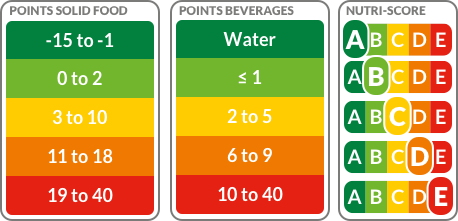

In [ ]:
df_out_remove_IQR.shape

(533861, 26)

In [ ]:
def impute_nutri_grade (dataframe):
  for i, row in dataframe[dataframe['nutriscore_grade'].isnull()].iterrows():  # i: dataframe index; row: chaque ligne (row) au format series
        if (row['pnns_groups_1']!='Beverages'): #Aliments solides      
          if (row['nutriscore_score'] >= -15) and (row['nutriscore_score'] <= -1) :
            dataframe.loc[i,'nutriscore_grade']='A'
          elif (row['nutriscore_score'] > -1) and (row['nutriscore_score'] <= 2) :
            dataframe.loc[i,'nutriscore_grade']='B'
          elif (row['nutriscore_score'] > 2) and (row['nutriscore_score'] <= 10) :
            dataframe.loc[i,'nutriscore_grade']='C'
          elif (row['nutriscore_score'] > 10) and (row['nutriscore_score'] <= 18) :
            dataframe.loc[i,'nutriscore_grade']='D'
          elif (row['nutriscore_score'] > 18) and (row['nutriscore_score'] <= 40) :
            dataframe.loc[i,'nutriscore_grade']='E'
        else:
          x = row['product_name'].lower()
          if (('eau' in x) | ('water' in x) | ('agua' in x)): # Eau
            dataframe.loc[i,'nutriscore_grade']= 'A' 
          elif (row['nutriscore_score'] <= -1) :
            dataframe.loc[i,'nutriscore_grade']='B'
          elif (row['nutriscore_score'] > -1) and (row['nutriscore_score'] <= 5) :
            dataframe.loc[i,'nutriscore_grade']='C'
          elif (row['nutriscore_score'] > 5) and (row['nutriscore_score'] <= 9) :
            dataframe.loc[i,'nutriscore_grade']='D'
          elif (row['nutriscore_score'] > 9) and (row['nutriscore_score'] <= 40) :
            dataframe.loc[i,'nutriscore_grade']='E'
          
  return dataframe

In [ ]:
df_out_remove_IQR = impute_nutri_grade(df_out_remove_IQR)

In [ ]:
df_out_remove_IQR.head()


,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,graisses_100g,graisses_saturees_100g,glucides_100g,sucres_100g,fibre_100g,proteines_100g,sel_100g,sodium_100g
0,0000000000017,Vitória crackers,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,9.0,C,unknown,unknown,375.0,7.0,3.08,70.10,15.00,0.000000,7.8,1.40,0.560
1,0000000000123,Sauce Sweety chili 0%,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,9.0,C,unknown,unknown,21.0,0.0,0.00,4.80,0.40,0.254545,0.2,2.04,0.816
2,0000000000178,Mini coco,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,4.0,C,unknown,unknown,60.0,3.0,1.00,10.00,3.00,0.509091,2.0,1.15,0.460
3,000000000075,Sachet calisson,autre,autre,autre,autre,autre,en:fr,france,autre,autre,autre,autre,0.0,B,unknown,unknown,61.5,1.5,0.50,12.75,9.25,0.763636,1.1,0.00,0.000
4,000000000080,Pur jus de pomme,autre,autre,autre,autre,autre,en:fr,france,autre,autre,autre,autre,3.0,C,unknown,unknown,63.0,0.0,0.00,15.50,15.50,1.018182,0.2,0.00,0.000


### <font color='red'>Analyse finale des données manqantes</font>

In [ ]:
df_out_remove_IQR.shape

(533861, 26)

Le jeux de données est rempli à 99.97%
et il a 0.03% de données manquantes
 
 


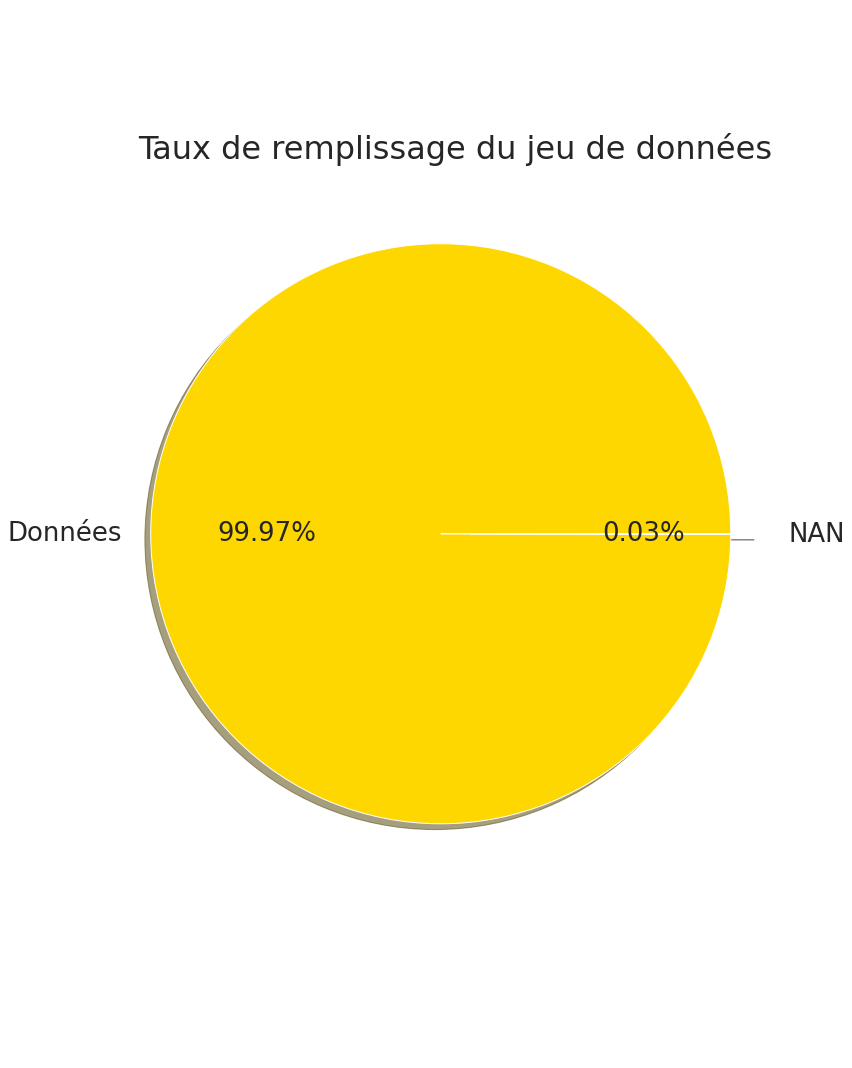

In [ ]:
pie_NaN(df_out_remove_IQR)

In [ ]:
df_out_remove_IQR.isna().sum()

code                                             0
product_name                                     0
packaging_tags                                   0
brands_tags                                      0
origins_tags                                     0
manufacturing_places_tags                        0
labels_tags                                      0
countries                                     1773
countries_tags                                   0
traces_tags                                      0
additives_tags                                   0
ingredients_from_palm_oil_tags                   0
ingredients_that_may_be_from_palm_oil_tags       0
nutriscore_score                                 0
nutriscore_grade                                 0
pnns_groups_1                                 2153
pnns_groups_2                                    0
energy-kcal_100g                                 0
graisses_100g                                    0
graisses_saturees_100g         

Suite à la suppression des outliers, le taux de données manquantes est passé de 2,15% à 0,1%. Les 0,03% de données restantes se situent dans les colonnes countries, pnns_groups_1, qui sont des variables non numériques. 

### <font color='blue'>**Export du CSV final** </font>

In [ ]:
df_out_remove_IQR.shape

(533861, 26)

In [ ]:
csv_final_imputed_cleaned = df_out_remove_IQR.copy()

In [ ]:
csv_final_imputed_cleaned.shape

(533861, 26)

In [ ]:
#sur google colab
from google.colab import drive
drive.mount('/content/drive')
csv_final_imputed_cleaned.to_csv('csv_final_imputed_cleaned.csv', index=False)
!cp csv_final_imputed_cleaned.csv /content/drive/My\ Drive/ 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#csv_final_impute_cleaned.to_csv('Data/csv_final_impute_cleaned.csv', index=False)

### <font color='blue'>**Taille du jeu de données final nettoyé comparé à la taille du jeu de données initial** </font>

In [ ]:
taille_jeux = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           csv_final_imputed_cleaned.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             csv_final_imputed_cleaned.isna().sum().sum()/
                             csv_final_imputed_cleaned.shape[0] / 
                             csv_final_imputed_cleaned.shape[1]*100]
                           })

In [ ]:
taille_jeux

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(1637262, 184)",79.906704
1,données nettoyées,"(533861, 26)",0.028285


Lorsque l'on compare le jeu de données initial et le jeu de données nettoyé, on voit que l'on passe de 1 637 262 lignes et 184 colonnes à 533 861 lignes pour 26 colonnes. De plus, on passe de 79,9% de données manquantes dans le jeu de données initial à 0,03 % dans le jeu de données nettoyé.